In [20]:
from numpy import loadtxt
from rfpimp import permutation_importances
from scipy.spatial import distance 
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as spstats
import seaborn as sns
import sqlite3
import xgboost as xgb

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
pd.set_option("display.width"    , 1000)
pd.set_option("display.max_rows" , 1500)

In [2]:
# Static info
REMOVE_COUNTRIES_CLUSTERS ="""
   ( 
      CountryCode != 'WLD' AND     CountryCode != 'LMY' AND     CountryCode != 'MIC' AND     CountryCode != 'LMC' AND     CountryCode != 'UMC' AND     CountryCode != 'EAS' AND     CountryCode != 'EAP' AND     CountryCode != 'SAS' AND     CountryCode != 'HIC' AND     CountryCode != 'OED' AND     CountryCode != 'OEC' AND     CountryCode != 'SSF' AND     CountryCode != 'SSA' AND     CountryCode != 'LDC' AND     CountryCode != 'ECS' AND     CountryCode != 'LCN' AND     CountryCode != 'LIC' AND     CountryCode != 'LAC' AND     CountryCode != 'EUU' AND     CountryCode != 'FCS' AND     CountryCode != 'MEA' AND     CountryCode != 'ARB' AND     CountryCode != 'MNA' AND     CountryCode != 'NAC' AND     CountryCode != 'EMU' AND     CountryCode != 'NOC'   AND     CountryCode != 'ECA' AND     CountryCode != 'HPC' 
    )
"""


array_indicators=[       'Access to electricity (% of population)',
    'Access to non-solid fuel (% of population)',
    'Adjusted net enrolment rate, primary, both sexes (%)',
    'Adjusted net national income (annual % growth)',
    'Adjusted net national income (constant 2005 US$)',
    'Adjusted net national income per capita (annual % growth)',
    'Adjusted net national income per capita (constant 2005 US$)',
    'Adjusted net savings, excluding particulate emission damage (% of GNI)',
    'Adjusted net savings, including particulate emission damage (% of GNI)',
    'Adjusted savings: carbon dioxide damage (% of GNI)',
    'Adjusted savings: consumption of fixed capital (% of GNI)',
    'Adjusted savings: education expenditure (% of GNI)',
    'Adjusted savings: energy depletion (% of GNI)',
    'Adjusted savings: gross savings (% of GNI)',
    'Adjusted savings: mineral depletion (% of GNI)',
    'Adjusted savings: natural resources depletion (% of GNI)',
    'Adjusted savings: net forest depletion (% of GNI)',
    'Adjusted savings: net national savings (% of GNI)',
    'Adjusted savings: particulate emission damage (% of GNI)',
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'Adult literacy rate, population 15+ years, both sexes (%)',
    'Age dependency ratio (% of working-age population)',
    'Age dependency ratio, old (% of working-age population)',
    'Age dependency ratio, young (% of working-age population)',
    'Agricultural irrigated land (% of total agricultural land)',
    'Agricultural land (% of land area)',
    'Agricultural machinery, tractors per 100 sq. km of arable land',
    'Agricultural raw materials exports (% of merchandise exports)',
    'Agricultural raw materials imports (% of merchandise imports)',
    'Agriculture value added per worker (constant 2005 US$)',
    'Agriculture, value added (% of GDP)',
    'Agriculture, value added (annual % growth)',
    'Agriculture, value added (constant 2005 US$)',
    'Alternative and nuclear energy (% of total energy use)',
    'Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%)',
    'Annualized average growth rate in per capita real survey mean consumption or income, total population (%)',
    'Arable land (% of land area)',
    'Armed forces personnel, total',
    'Arms exports (SIPRI trend indicator values)',
    'Arms imports (SIPRI trend indicator values)',
    'Automated teller machines (ATMs) (per 100,000 adults)',
    'Average precipitation in depth (mm per year)',
    'Average time to clear exports through customs (days)',
    'Bank capital to assets ratio (%)',
    'Bank nonperforming loans to total gross loans (%)',
    'Battle-related deaths (number of people)',
    'Binding coverage, all products (%)',
    'Binding coverage, manufactured products (%)',
    'Binding coverage, primary products (%)',
    'Bound rate, simple mean, all products (%)',
    'Bound rate, simple mean, manufactured products (%)',
    'Bound rate, simple mean, primary products (%)',
    'Burden of customs procedure, WEF (1=extremely inefficient to 7=extremely efficient)',
    'Business extent of disclosure index (0=less disclosure to 10=more disclosure)',
    'Cash surplus/deficit (% of GDP)',
    'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
    'Cause of death, by injury (% of total)',
    'Cause of death, by non-communicable diseases (% of total)',
    'Central government debt, total (% of GDP)',
    'Cereal production (metric tons)', 'Cereal yield (kg per hectare)',
    'Chemicals (% of value added in manufacturing)',
    'Coal rents (% of GDP)',
    'Combustible renewables and waste (% of total energy)',
    'Commercial bank branches (per 100,000 adults)',
    'Communications, computer, etc. (% of service exports, BoP)',
    'Communications, computer, etc. (% of service imports, BoP)',
    'Compensation of employees (% of expense)',
    'Computer, communications and other services (% of commercial service exports)',
    'Computer, communications and other services (% of commercial service imports)',
    'Consumer price index (2010 = 100)',
    'Container port traffic (TEU: 20 foot equivalent units)',
    'Contraceptive prevalence (% of women ages 15-49)',
    'Contributing family workers, total (% of total employed)',
    'Cost of business start-up procedures (% of GNI per capita)',
    'Cost to export (US$ per container)',
    'Cost to import (US$ per container)',
    'Crop production index (2004-2006 = 100)',
    'Current account balance (% of GDP)',
    'Current education expenditure, primary (% of total expenditure in primary public institutions)',
    'Current education expenditure, secondary (% of total expenditure in secondary public institutions)',
    'Current education expenditure, tertiary (% of total expenditure in tertiary public institutions)',
    'Current education expenditure, total (% of total expenditure in public institutions)',
    'Customs and other import duties (% of tax revenue)',
    'Death rate, crude (per 1,000 people)',
    'Delay in obtaining an electrical connection (days)',
    'Deposit interest rate (%)',
    'Depth of credit information index (0=low to 8=high)',
    'Diabetes prevalence (% of population ages 20 to 79)',
    'Distance to frontier score (0=lowest performance to 100=frontier)',
    'Documents to export (number)', 'Documents to import (number)',
    'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
    'Ease of doing business index (1=most business-friendly regulations)',
    'Electric power consumption (kWh per capita)',
    'Electric power transmission and distribution losses (% of output)',
    'Electricity production from coal sources (% of total)',
    'Electricity production from hydroelectric sources (% of total)',
    'Electricity production from natural gas sources (% of total)',
    'Electricity production from nuclear sources (% of total)',
    'Electricity production from oil sources (% of total)',
    'Electricity production from renewable sources, excluding hydroelectric (% of total)',
    'Electricity production from renewable sources, excluding hydroelectric (kWh)',
    'Emigration rate of tertiary educated (% of total tertiary educated population)',
    'Employers, total (% of employment)',
    'Employment in agriculture (% of total employment)',
    'Employment in industry (% of total employment)',
    'Employment in services (% of total employment)',
    'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
    'Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)',
    'Energy imports, net (% of energy use)',
    'Energy intensity level of primary energy (MJ/$2011 PPP GDP)',
    'Energy use (kg of oil equivalent per capita)',
    'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)',
    'Enrolment in primary education, both sexes (number)',
    'Enrolment in secondary education, both sexes (number)',
    'Enrolment in secondary general, both sexes (number)',
    'Enrolment in secondary vocational, both sexes (number)',
    'Expenditure on education as % of total government expenditure (%)',
    'Expenditure on primary as % of government expenditure on education (%)',
    'Expenditure on secondary as % of government expenditure on education (%)',
    'Expenditure on tertiary as % of government expenditure on education (%)',
    'Export value index (2000 = 100)',
    'Export volume index (2000 = 100)',
    'Exports of goods and services (% of GDP)',
    'Exports of goods and services (annual % growth)',
    'Exports of goods and services (constant 2005 US$)',
    'External balance on goods and services (% of GDP)',
    'External resources for health (% of total expenditure on health)',
    'Fertility rate, total (births per woman)',
    'Fertilizer consumption (% of fertilizer production)',
    'Fertilizer consumption (kilograms per hectare of arable land)',
    'Final consumption expenditure (constant 2005 US$)',
    'Final consumption expenditure, etc. (% of GDP)',
    'Final consumption expenditure, etc. (annual % growth)',
    'Final consumption expenditure, etc. (constant 2005 US$)',
    'Firms expected to give gifts in meetings with tax officials (% of firms)',
    'Firms offering formal training (% of firms)',
    'Firms that do not report all sales for tax purposes (% of firms)',
    'Firms using banks to finance investment (% of firms)',
    'Firms using banks to finance working capital (% of firms)',
    'Fixed broadband subscriptions (per 100 people)',
    'Fixed telephone subscriptions (per 100 people)',
    'Food exports (% of merchandise exports)',
    'Food imports (% of merchandise imports)',
    'Food production index (2004-2006 = 100)',
    'Food, beverages and tobacco (% of value added in manufacturing)',
    'Foreign direct investment, net inflows (% of GDP)',
    'Foreign direct investment, net outflows (% of GDP)',
    'Forest area (% of land area)', 'Forest area (sq. km)',
    'Forest rents (% of GDP)',
    'Fossil fuel energy consumption (% of total)',
    'Fuel exports (% of merchandise exports)',
    'GDP deflator (base year varies by country)',
    'GDP growth (annual %)',
    'GDP per capita (constant 2005 US$)',
    'GDP per person employed (constant 1990 PPP $)',
    'GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent)',
    'GDP, PPP (constant 2011 international $)',
    'GEF benefits index for biodiversity (0 = no biodiversity potential to 100 = maximum)',
    'GINI index (World Bank estimate)', 'GNI (constant 2005 US$)',
    'GNI growth (annual %)', 'GNI per capita (constant 2005 US$)',
    'GNI per capita growth (annual %)',
    'GNI per capita, PPP (constant 2011 international $)',
    'General government final consumption expenditure (% of GDP)',
    'General government final consumption expenditure (annual % growth)',
    'General government final consumption expenditure (constant 2005 US$)',
    'Goods and services expense (% of expense)',
    'Government expenditure on education as % of GDP (%)',
    'Government expenditure per primary student as % of GDP per capita (%)',
    'Government expenditure per secondary student as % of GDP per capita (%)',
    'Government expenditure per tertiary student as % of GDP per capita (%)',
    'Grants and other revenue (% of revenue)',
    'Gross capital formation (% of GDP)',
    'Gross capital formation (annual % growth)',
    'Gross capital formation (constant 2005 US$)',
    'Gross domestic income (constant 2005 US$)',
    'Gross domestic savings (% of GDP)',
    'Gross enrolment ratio, pre-primary, both sexes (%)',
    'Gross enrolment ratio, primary and secondary, gender parity index (GPI)',
    'Gross enrolment ratio, primary, both sexes (%)',
    'Gross enrolment ratio, primary, gender parity index (GPI)',
    'Gross enrolment ratio, secondary, both sexes (%)',
    'Gross enrolment ratio, tertiary, both sexes (%)',
    'Gross enrolment ratio, tertiary, gender parity index (GPI)',
    'Gross fixed capital formation (% of GDP)',
    'Gross fixed capital formation (annual % growth)',
    'Gross fixed capital formation (constant 2005 US$)',
    'Gross intake ratio to Grade 1 of primary education, both sexes (%)',
    'Gross national expenditure (% of GDP)',
    'Gross national expenditure (constant 2005 US$)',
    'Gross national expenditure deflator (base year varies by country)',
    'Gross savings (% of GDP)', 'Gross savings (% of GNI)',
    'Gross value added at factor cost (constant 2005 US$)',
    'Health expenditure per capita, PPP (constant 2011 international $)',
    'Health expenditure, private (% of GDP)',
    'Health expenditure, public (% of GDP)',
    'Health expenditure, total (% of GDP)',
    'High-technology exports (% of manufactured exports)',
    'Hospital beds (per 1,000 people)',
    'Household final consumption expenditure (annual % growth)',
    'Household final consumption expenditure (constant 2005 US$)',
    'Household final consumption expenditure per capita (constant 2005 US$)',
    'Household final consumption expenditure per capita growth (annual %)',
    'Household final consumption expenditure, PPP (constant 2011 international $)',
    'Household final consumption expenditure, PPP (current international $)',
    'Household final consumption expenditure, etc. (% of GDP)',
    'Household final consumption expenditure, etc. (annual % growth)',
    'Household final consumption expenditure, etc. (constant 2005 US$)',
    'ICT goods exports (% of total goods exports)',
    'ICT goods imports (% total goods imports)',
    'ICT service exports (% of service exports, BoP)',
    'Import value index (2000 = 100)',
    'Imports of goods and services (% of GDP)',
    'Improved sanitation facilities (% of population with access)',
    'Improved sanitation facilities, rural (% of rural population with access)',
    'Improved sanitation facilities, urban (% of urban population with access)',
    'Income share held by fourth 20%',
    'Income share held by highest 10%',
    'Income share held by highest 20%',
    'Income share held by lowest 10%',
    'Income share held by lowest 20%',
    'Income share held by second 20%',
    'Income share held by third 20%',
    'Industry, value added (% of GDP)',
    'Industry, value added (annual % growth)',
    'Industry, value added (constant 2005 US$)',
    'Inflation, GDP deflator (annual %)',
    'Inflation, consumer prices (annual %)',
    'Informal payments to public officials (% of firms)',
    'Insurance and financial services (% of commercial service exports)',
    'Insurance and financial services (% of commercial service imports)',
    'Insurance and financial services (% of service exports, BoP)',
    'Insurance and financial services (% of service imports, BoP)',
    'Intentional homicides (per 100,000 people)',
    'Interest payments (% of expense)',
    'Interest payments (% of revenue)',
    'Interest rate spread (lending rate minus deposit rate, %)',
    'International migrant stock (% of population)',
    'International migrant stock, total',
    'International tourism, expenditures (% of total imports)',
    'International tourism, number of arrivals',
    'International tourism, number of departures',
    'International tourism, receipts (% of total exports)',
    'Internationally-recognized quality certification (% of firms)',
    'Internet users (per 100 people)',
    'Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)',
    'Labor force participation rate for ages 15-24, total (%) (national estimate)',
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
    'Labor force participation rate, total (% of total population ages 15+) (national estimate)',
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
    'Labor force with primary education (% of total)',
    'Labor force with secondary education (% of total)',
    'Labor force with tertiary education (% of total)',
    'Labor tax and contributions (% of commercial profits)',
    'Lead time to export, median case (days)',
    'Lead time to import, median case (days)',
    'Lending interest rate (%)',
    'Life expectancy at birth, total (years)',
    'Lifetime risk of maternal death (%)',
    'Lifetime risk of maternal death (1 in: rate varies by country)',
    'Liner shipping connectivity index (maximum value in 2004 = 100)',
    'Listed domestic companies, total',
    'Livestock production index (2004-2006 = 100)',
    'Logistics performance index: Overall (1=low to 5=high)',
    'Long-term unemployment (% of total unemployment)',
    'Losses due to theft, robbery, vandalism, and arson (% sales)',
    'Low-birthweight babies (% of births)',
    'Lower secondary completion rate, both sexes (%)',
    'Machinery and transport equipment (% of value added in manufacturing)',
    'Manufactures exports (% of merchandise exports)',
    'Manufactures imports (% of merchandise imports)',
    'Manufacturing, value added (% of GDP)',
    'Manufacturing, value added (annual % growth)',
    'Manufacturing, value added (constant 2005 US$)',
    'Marine protected areas (% of territorial waters)',
    'Market capitalization of listed domestic companies (% of GDP)',
    'Merchandise trade (% of GDP)',
    'Military expenditure (% of GDP)',
    'Military expenditure (% of central government expenditure)',
    'Mobile cellular subscriptions (per 100 people)',
    'Mortality rate, infant (per 1,000 live births)',
    'Mortality rate, neonatal (per 1,000 live births)',
    'Mortality rate, under-5 (per 1,000)',
    'Natural gas rents (% of GDP)',
    'Net barter terms of trade index (2000 = 100)',
    'Net enrolment rate, primary, both sexes (%)',
    'Net enrolment rate, secondary, both sexes (%)',
    'Net incurrence of liabilities, domestic (% of GDP)',
    'Net incurrence of liabilities, foreign (% of GDP)',
    'Net intake rate to Grade 1 of primary education, both sexes (%)',
    'New business density (new registrations per 1,000 people ages 15-64)',
    'Nurses and midwives (per 1,000 people)',
    'Official entrance age to lower secondary education (years)',
    'Official entrance age to primary education (years)',
    'Oil rents (% of GDP)',
    'Ores and metals exports (% of merchandise exports)',
    'Ores and metals imports (% of merchandise imports)',
    'Other expense (% of expense)',
    'Other manufacturing (% of value added in manufacturing)',
    'Other taxes payable by businesses (% of commercial profits)',
    'Out-of-pocket health expenditure (% of private expenditure on health)',
    'Out-of-pocket health expenditure (% of total expenditure on health)',
    'Out-of-school children of primary school age, both sexes (number)',
    'Part time employment, total (% of total employment)',
    'Percentage of enrolment in primary education in private institutions (%)',
    'Percentage of enrolment in secondary education in private institutions (%)',
    'Percentage of repeaters in primary education, all grades, both sexes (%)',
    'Percentage of repeaters in secondary general education, all grades, both sexes (%)',
    'Permanent cropland (% of land area)',
    'Personal remittances, received (% of GDP)',
    'Point-of-sale terminals (per 100,000 adults)',
    'Population ages 65 and above (% of total)',
    'Population density (people per sq. km of land area)',
    'Population growth (annual %)', 'Population in largest city',
    'Population in the largest city (% of urban population)',
    'Population in urban agglomerations of more than 1 million (% of total population)',
    'Population living in areas where elevation is below 5 meters (% of total population)',
    'Population, ages 0-14 (% of total)',
    'Population, ages 15-64 (% of total)',
    'Price level ratio of PPP conversion factor (GDP) to market exchange rate',
    'Primary completion rate, both sexes (%)',
    'Primary to secondary general education transition rate, both sexes (%)',
    'Private credit bureau coverage (% of adults)',
    'Procedures to build a warehouse (number)',
    'Procedures to register property (number)',
    'Profit tax (% of commercial profits)',
    'Proportion of seats held by women in national parliaments (%)',
    'Public credit registry coverage (% of adults)',
    'Pump price for diesel fuel (US$ per liter)',
    'Pump price for gasoline (US$ per liter)',
    'Pupil-teacher ratio in primary education (headcount basis)',
    'Pupil-teacher ratio in secondary education (headcount basis)',
    'Quality of port infrastructure, WEF (1=extremely underdeveloped to 7=well developed and efficient by international standards)',
    'Rail lines (total route-km)',
    'Railways, goods transported (million ton-km)',
    'Railways, passengers carried (million passenger-km)',
    'Real effective exchange rate index (2010 = 100)',
    'Real interest rate (%)',
    'Renewable electricity output (% of total electricity output)',
    'Renewable energy consumption (% of total final energy consumption)',
    'Renewable internal freshwater resources per capita (cubic meters)',
    'Renewable internal freshwater resources, total (billion cubic meters)',
    'Research and development expenditure (% of GDP)',
    'Researchers in R&D (per million people)',
    'Revenue, excluding grants (% of GDP)',
    'Risk premium on lending (lending rate minus treasury bill rate, %)',
    'Rural population (% of total population)',
    'Rural population growth (annual %)',
    'S&P Global Equity Indices (annual % change)',
    'Scientific and technical journal articles',
    'Self-employed, total (% of total employed)',
    'Services, etc., value added (% of GDP)',
    'Services, etc., value added (annual % growth)',
    'Services, etc., value added (constant 2005 US$)',
    'Share of tariff lines with international peaks, all products (%)',
    'Share of tariff lines with international peaks, manufactured products (%)',
    'Share of tariff lines with international peaks, primary products (%)',
    'Share of tariff lines with specific rates, all products (%)',
    'Share of tariff lines with specific rates, manufactured products (%)',
    'Share of tariff lines with specific rates, primary products (%)',
    'Share of women in wage employment in the nonagricultural sector (% of total nonagricultural employment)',
    'Share of youth not in education, employment, or training, total (% of youth population)',
    'Social contributions (% of revenue)',
    'Start-up procedures to register a business (number)',
    'Stocks traded, total value (% of GDP)',
    'Stocks traded, turnover ratio of domestic shares (%)',
    'Strength of legal rights index (0=weak to 12=strong)',
    'Subsidies and other transfers (% of expense)',
    'Survey mean consumption or income per capita, bottom 40% of population (2011 PPP $ per day)',
    'Survey mean consumption or income per capita, total population (2011 PPP $ per day)',
    'Survival rate to Grade 5 of primary education, both sexes (%)',
    'Survival rate to the last grade of primary education, both sexes (%)',
    'Tariff rate, applied, simple mean, all products (%)',
    'Tariff rate, applied, simple mean, manufactured products (%)',
    'Tariff rate, applied, simple mean, primary products (%)',
    'Tariff rate, applied, weighted mean, all products (%)',
    'Tariff rate, applied, weighted mean, manufactured products (%)',
    'Tariff rate, applied, weighted mean, primary products (%)',
    'Tariff rate, most favored nation, simple mean, all products (%)',
    'Tariff rate, most favored nation, simple mean, manufactured products (%)',
    'Tariff rate, most favored nation, simple mean, primary products (%)',
    'Tariff rate, most favored nation, weighted mean, all products (%)',
    'Tariff rate, most favored nation, weighted mean, manufactured products (%)',
    'Tariff rate, most favored nation, weighted mean, primary products (%)',
    'Tax payments (number)', 'Tax revenue (% of GDP)',
    'Taxes on goods and services (% of revenue)',
    'Taxes on goods and services (% value added of industry and services)',
    'Taxes on income, profits and capital gains (% of revenue)',
    'Taxes on income, profits and capital gains (% of total taxes)',
    'Taxes on international trade (% of revenue)',
    'Teachers in primary education, both sexes (number)',
    'Teachers in secondary education, both sexes (number)',
    'Technicians in R&D (per million people)',
    'Terrestrial and marine protected areas (% of total territorial area)',
    'Terrestrial protected areas (% of total land area)',
    'Textiles and clothing (% of value added in manufacturing)',
    'Theoretical duration of primary education (years)',
    'Theoretical duration of secondary education (years)',
    'Time required to build a warehouse (days)',
    'Time required to enforce a contract (days)',
    'Time required to get electricity (days)',
    'Time required to register property (days)',
    'Time required to start a business (days)',
    'Time spent dealing with the requirements of government regulations (% of senior management time)',
    'Time to export (days)', 'Time to import (days)',
    'Time to prepare and pay taxes (hours)',
    'Time to resolve insolvency (years)',
    'Total natural resources rents (% of GDP)',
    'Total reserves in months of imports',
    'Total tax rate (% of commercial profits)', 'Trade (% of GDP)',
    'Trade in services (% of GDP)',
    'Transport services (% of commercial service exports)',
    'Transport services (% of commercial service imports)',
    'Transport services (% of service exports, BoP)',
    'Transport services (% of service imports, BoP)',
    'Travel services (% of commercial service exports)',
    'Travel services (% of commercial service imports)',
    'Travel services (% of service exports, BoP)',
    'Travel services (% of service imports, BoP)',
    'Unemployment, total (% of total labor force)',
    'Unmet need for contraception (% of married women ages 15-49)',
    'Urban population (% of total)',
    'Urban population growth (annual %)',
    'Vulnerable employment, total (% of total employment)',
    'Wage and salaried workers, total (% of total employed)',
    'Wholesale price index (2010 = 100)',
    'Youth literacy rate, population 15-24 years, both sexes (%)']

df_indicator = pd.DataFrame(array_indicators)
df_indicator.columns=['IndicatorName']
df_indicator.to_csv("Indicators-chosen.csv")

# 

## Queries against the sqlite

In [3]:
# List tables
conn = sqlite3.connect('../input/world-development-indicators/database.sqlite')

pd.read_sql(f"""SELECT name from sqlite_master where type = 'table'""",conn)

,name
0,Country
1,CountryNotes
2,Series
3,Indicators
4,SeriesNotes
5,Footnotes


In [4]:
# List region
pd.read_sql(f"""SELECT distinct(Region) from Country  """,conn) 

,Region
0,South Asia
1,Europe & Central Asia
2,Middle East & North Africa
3,East Asia & Pacific
4,Sub-Saharan Africa
5,Latin America & Caribbean
6,
7,North America


In [5]:
# List countries for a given Regien

pd.read_sql(f"""SELECT CountryCode from Country WHERE Region = 'Europe & Central Asia' """,conn).CountryCode.values

array(['ALB', 'ADO', 'ARM', 'AUT', 'AZE', 'BLR', 'BEL', 'BIH', 'BGR',
       'CHI', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FRO', 'FIN', 'FRA',
       'GEO', 'DEU', 'GRC', 'GRL', 'HUN', 'ISL', 'IRL', 'IMY', 'ITA',
       'KAZ', 'KSV', 'KGZ', 'LVA', 'LIE', 'LTU', 'LUX', 'MKD', 'MDA',
       'MCO', 'MNE', 'NLD', 'NOR', 'POL', 'PRT', 'ROM', 'RUS', 'SMR',
       'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'TJK', 'TUR', 'TKM',
       'UKR', 'GBR', 'UZB'], dtype=object)

In [6]:
%%time

from tqdm.notebook import tqdm


def get_data(REGION,array_indicators):
    
    """Return dataframe, with the indicators specified in """
    conn = sqlite3.connect('../input/world-development-indicators/database.sqlite')
    array_dfs=[]

    MIN_YEAR=pd.read_sql(f""" SELECT Min(Year) FROM Indicators""",conn).values[0][0]

    array_countries=pd.read_sql(f"""SELECT CountryCode from Country WHERE Region = '{REGION}' ORDER BY CountryCode """,conn).CountryCode.values

    for CountryCode in tqdm(array_countries, desc="Getting indicators from countries") :
        #print(CountryCode)
        array_results = []
        array_years_with_data = pd.read_sql(f""" SELECT distinct(Year) FROM Indicators WHERE  CountryCode = '{CountryCode}'  """,conn).Year.values
        df_country_all_years = pd.read_sql(f"""
                        SELECT IndicatorName,Value,Year
                        FROM Indicators
                        WHERE 
                        CountryCode = '{CountryCode}' """,conn) 
        for Year in array_years_with_data:
            dict_country_year = { 'CountryCode' : CountryCode , "Year" : Year, "Decade" : round((Year - MIN_YEAR) / 10)}
            try :
                df = df_country_all_years.query(f"Year == {Year}")[["IndicatorName","Value"]]
                df = df.T
                df.columns=df.iloc[0]
                df = df.iloc[1:].rename_axis(None, axis=1)
                df = df.reset_index()
                dict_row = {k : v[0] for k,v in df.to_dict('dict').items()}
            except: continue
            array_results.append({**dict_country_year, **dict_row} )

        df_temp = pd.DataFrame(array_results)
        kk=pd.DataFrame()
        kk[["CountryCode" ,"Year", "Decade"]]=df_temp[["CountryCode" ,"Year", "Decade"]]
        for column in list(set(df_temp.columns)&set(array_indicators)) :
            df_temp[column].apply(pd.to_numeric,errors='coerce')
            kk[column]=df_temp[column].fillna(df_temp[column].mean())  
        array_dfs.append(kk)
    df=pd.concat(array_dfs)
    return df

REGION='Europe & Central Asia'
df = get_data(REGION,array_indicators)
df


CPU times: user 3min 33s, sys: 963 ms, total: 3min 34s
Wall time: 3min 34s


,CountryCode,Year,Decade,Proportion of seats held by women in national parliaments (%),"Gross enrolment ratio, pre-primary, both sexes (%)",Arable land (% of land area),ICT goods exports (% of total goods exports),Population growth (annual %),Total natural resources rents (% of GDP),Agriculture value added per worker (constant 2005 US$),...,"Net intake rate to Grade 1 of primary education, both sexes (%)",Market capitalization of listed domestic companies (% of GDP),Fertilizer consumption (% of fertilizer production),"Stocks traded, total value (% of GDP)","Listed domestic companies, total",Real effective exchange rate index (2010 = 100),"Stocks traded, turnover ratio of domestic shares (%)",Population in largest city,Population in the largest city (% of urban population),S&P Global Equity Indices (annual % change)
0,ADO,1960,0.0,26.688722,146.536850,3.364111,13.509433,7.105041,0.000000,4149.463596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADO,1961,0.0,26.688722,146.536850,2.127660,13.509433,6.926121,0.000000,4149.463596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ADO,1962,0.0,26.688722,146.536850,2.127660,13.509433,6.724770,0.000000,4149.463596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ADO,1963,0.0,26.688722,146.536850,2.127660,13.509433,6.508305,0.000000,4149.463596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ADO,1964,0.0,26.688722,146.536850,2.127660,13.509433,6.259422,0.000000,4149.463596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,UZB,2011,5.0,22.000000,24.828470,10.108134,NaN,2.684016,31.152112,1864.788729,...,75.766876,1.01988,80.551714,0.182279,132.000000,NaN,61.103086,2.216946e+06,20.889082,NaN
52,UZB,2012,5.0,22.000000,35.305795,10.343206,NaN,1.472100,24.408720,2007.240768,...,75.766876,1.01988,85.604000,0.209045,98.166667,NaN,61.103086,2.225088e+06,20.654283,NaN
53,UZB,2013,5.0,22.000000,35.305795,10.343206,NaN,1.561904,20.188934,2160.670084,...,75.766876,1.01988,85.436190,0.209045,98.166667,NaN,61.103086,2.233259e+06,20.389138,NaN
54,UZB,2014,5.0,22.000000,35.305795,10.412767,NaN,1.686900,50.030325,2331.687162,...,75.766876,1.01988,77.712101,0.209045,98.166667,NaN,61.103086,2.241461e+06,20.097807,NaN


In [7]:
df.to_csv("first_model.csv")

In [11]:
from scipy.stats import zscore


def get_data_for_training(X_column):
    kk  = pd.read_csv("first_model.csv")
    kk = kk.drop(kk.columns[0:3], axis=1)

    for column in kk.columns :
        kk[column]=kk[column].fillna(kk[column].mean())
    kk.columns=[ x  for x in  kk.columns  if x != X_column] + [ X_column]
   
    #kk= kk[kk.reset_index().columns[4:]]
    #for column in kk.columns:
    #    kk[column]=((kk[column]-kk[column].min())/(kk[column].max()-kk[column].min()))
    return kk

X_column = 'GDP per person employed (constant 1990 PPP $)'
get_data_for_training(X_column)

,Decade,Proportion of seats held by women in national parliaments (%),"Gross enrolment ratio, pre-primary, both sexes (%)",Arable land (% of land area),ICT goods exports (% of total goods exports),Population growth (annual %),Total natural resources rents (% of GDP),Agriculture value added per worker (constant 2005 US$),"Services, etc., value added (constant 2005 US$)",Share of women in wage employment in the nonagricultural sector (% of total nonagricultural employment),...,Market capitalization of listed domestic companies (% of GDP),Fertilizer consumption (% of fertilizer production),"Stocks traded, total value (% of GDP)","Listed domestic companies, total",Real effective exchange rate index (2010 = 100),"Stocks traded, turnover ratio of domestic shares (%)",Population in largest city,Population in the largest city (% of urban population),S&P Global Equity Indices (annual % change),GDP per person employed (constant 1990 PPP $)
0,0.0,26.688722,146.536850,3.364111,13.509433,7.105041,0.000000,4149.463596,2.432510e+09,46.271429,...,79.246678,35.779188,1377.322864,23.341587,244.296431,99.526021,59.142310,1.971670e+06,26.223487,8.091378
1,0.0,26.688722,146.536850,2.127660,13.509433,6.926121,0.000000,4149.463596,2.432510e+09,46.271429,...,79.246678,35.779188,1377.322864,23.341587,244.296431,99.526021,59.142310,1.971670e+06,26.223487,8.091378
2,0.0,26.688722,146.536850,2.127660,13.509433,6.724770,0.000000,4149.463596,2.432510e+09,46.271429,...,79.246678,35.779188,1377.322864,23.341587,244.296431,99.526021,59.142310,1.971670e+06,26.223487,8.091378
3,0.0,26.688722,146.536850,2.127660,13.509433,6.508305,0.000000,4149.463596,2.432510e+09,46.271429,...,79.246678,35.779188,1377.322864,23.341587,244.296431,99.526021,59.142310,1.971670e+06,26.223487,8.091378
4,0.0,26.688722,146.536850,2.127660,13.509433,6.259422,0.000000,4149.463596,2.432510e+09,46.271429,...,79.246678,35.779188,1377.322864,23.341587,244.296431,99.526021,59.142310,1.971670e+06,26.223487,8.091378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,5.0,22.000000,24.828470,10.108134,4.725444,2.684016,31.152112,1864.788729,1.248935e+10,37.935294,...,75.766876,1.019880,80.551714,0.182279,132.000000,99.526021,61.103086,2.216946e+06,20.889082,8.091378
3187,5.0,22.000000,35.305795,10.343206,4.725444,1.472100,24.408720,2007.240768,1.392351e+10,37.935294,...,75.766876,1.019880,85.604000,0.209045,98.166667,99.526021,61.103086,2.225088e+06,20.654283,8.091378
3188,5.0,22.000000,35.305795,10.343206,4.725444,1.561904,20.188934,2160.670084,1.530430e+10,37.935294,...,75.766876,1.019880,85.436190,0.209045,98.166667,99.526021,61.103086,2.233259e+06,20.389138,8.091378
3189,5.0,22.000000,35.305795,10.412767,4.725444,1.686900,50.030325,2331.687162,1.676387e+10,37.935294,...,75.766876,1.019880,77.712101,0.209045,98.166667,99.526021,61.103086,2.241461e+06,20.097807,8.091378


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

def train_data_for(kk,X_column):
    def r2(rf, X_train, y_train):
        return r2_score(y_train, rf.predict(X_train))
    
    y = kk[X_column]
    X = kk[[ x  for x in  kk.columns  if x != X_column]]
    np.random.seed(seed = 42)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.8, random_state = 42)
    rf = RandomForestRegressor(n_estimators = 100,
                               n_jobs = -1,
                               oob_score = True,
                               bootstrap = True,
                               random_state = 42)
    rf.fit(X_train, y_train)

    print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(
        rf.score(X_train, y_train),rf.oob_score_,rf.score(X_valid, y_valid))) 
    
    perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)
    ax = perm_imp_rfpimp.head(10).plot(kind="barh")
    ax.set_title(X_column) 
    return ax
                 

R^2 Training Score: 0.89 
OOB Score: 0.22 
R^2 Validation Score: -0.11


'\nR^2 Training Score: 0.90 \nOOB Score: 0.25 \nR^2 Validation Score: 0.09'

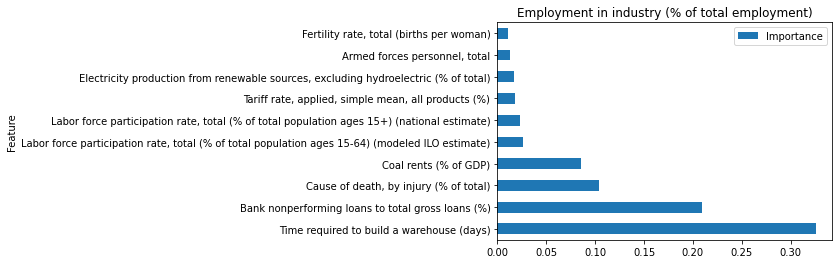

In [31]:
X_column = "Employment in industry (% of total employment)"
kk = get_data_for_training(X_column)                                                       
ax = train_data_for(kk,X_column)
"""
R^2 Training Score: 0.90 
OOB Score: 0.25 
R^2 Validation Score: 0.09"""


Text(0.5, 1.0, 'Employment in industry (% of total employment)')

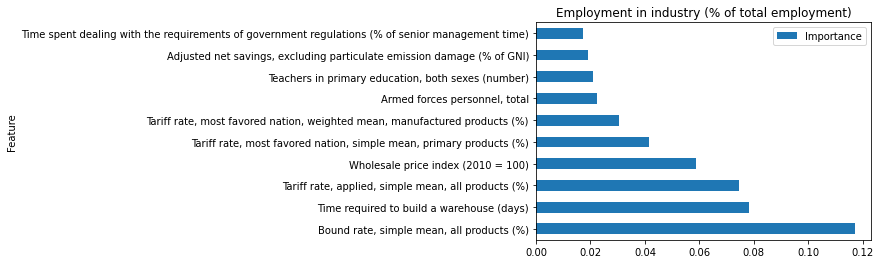

In [32]:
perm_imp_rfpimp
ax = perm_imp_rfpimp.head(10).plot(kind="barh")
ax.set_title(X_column)


In [ ]:
INDICATORS_ARRAY = [ 'Compensation of employees (% of expense)',
    'Electricity production from coal sources (% of total)',
    'Electricity production from nuclear sources (% of total)',
    'Electricity production from oil sources (% of total)',
    'Employment in industry (% of total employment)',
    'Exports of goods and services (% of GDP)',
    'GDP per capita (constant 2005 US$)',
    'Grants and other revenue (% of revenue)',
    'New business density (new registrations per 1,000 people ages 15-64)',
    'Other expense (% of expense)',
    'Population in the largest city (% of urban population)',
    'Railways, passengers carried (million passenger-km)',
    'Real interest rate (%)',
    'Renewable electricity output (% of total electricity output)',
    'Taxes on goods and services (% of revenue)',
    'Trade (% of GDP)' ]

for X_column in INDICATORS_ARRAY:
    if X_column not in array_indicators: continue
    kk = get_data_for_training(X_column)                                                       
    ax = train_data_for(kk,X_column)


In [ ]:
for X_column in INDICATORS_ARRAY:
    if X_column not in array_indicators: continue
    kk = get_data_for_training(X_column)                                                       
    ax = train_data_for(kk,X_column)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#data = pd.read_csv("D://Blogs//train.csv")
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range
#get_data_for_training(X_column)

y = kk.iloc[:,-1]
X = kk.iloc[:,0:450]



In [37]:

import lime
import lime.lime_tabular

X_column='GDP per person employed (constant 1990 PPP $)'

def get_lime(kk,X_column):

    kk.columns = [ x  for x in  kk.columns  if x != X_column] + [X_column]
    X, y = kk.iloc[:,:-1],kk.iloc[:,-1]


    np.random.seed(seed = 42)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.8, random_state = 42)

    from sklearn.ensemble import RandomForestRegressor
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)


    xg_reg.fit(X_train,y_train)
    rf = xg_reg
    explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                       mode = 'regression',
                                                       feature_names = X_train.columns,
                                                       discretize_continuous = True)

    np.random.seed(42)
    #exp = explainer.explain_instance(X_train.values[31], rf.predict, num_features = 5)
    #exp.show_in_notebook(show_all=False) #only the features used in the explanation are displayed

    exp = explainer.explain_instance(X_train.values[500], rf.predict, num_features = 5)
    #exp = explainer.explain_instance(X_train.values[637], rf.predict, num_features = 5)
    exp.show_in_notebook(show_all=False)

get_lime(kk,X_column)

ValueError: feature_names mismatch: ['Decade', 'Proportion of seats held by women in national parliaments (%)', 'Gross enrolment ratio, pre-primary, both sexes (%)', 'Arable land (% of land area)', 'ICT goods exports (% of total goods exports)', 'Population growth (annual %)', 'Total natural resources rents (% of GDP)', 'Agriculture value added per worker (constant 2005 US$)', 'Services, etc., value added (constant 2005 US$)', 'Share of women in wage employment in the nonagricultural sector (% of total nonagricultural employment)', 'Intentional homicides (per 100,000 people)', 'Percentage of enrolment in secondary education in private institutions (%)', 'Hospital beds (per 1,000 people)', 'Urban population growth (annual %)', 'Agricultural raw materials exports (% of merchandise exports)', 'Oil rents (% of GDP)', 'Government expenditure on education as % of GDP (%)', 'Terrestrial and marine protected areas (% of total territorial area)', 'Expenditure on secondary as % of government expenditure on education (%)', 'Current education expenditure, secondary (% of total expenditure in secondary public institutions)', 'Food imports (% of merchandise imports)', 'Manufacturing, value added (% of GDP)', 'Forest area (% of land area)', 'Theoretical duration of primary education (years)', 'Gross value added at factor cost (constant 2005 US$)', 'Mortality rate, under-5 (per 1,000)', 'Health expenditure, private (% of GDP)', 'Gross enrolment ratio, secondary, both sexes (%)', 'Pump price for diesel fuel (US$ per liter)', 'Agriculture, value added (% of GDP)', 'Agricultural land (% of land area)', 'Official entrance age to lower secondary education (years)', 'Teachers in secondary education, both sexes (number)', 'Percentage of repeaters in secondary general education, all grades, both sexes (%)', 'Adjusted savings: consumption of fixed capital (% of GNI)', 'Population density (people per sq. km of land area)', 'GDP deflator (base year varies by country)', 'Health expenditure, total (% of GDP)', 'Enrolment in secondary education, both sexes (number)', 'Survival rate to Grade 5 of primary education, both sexes (%)', 'Internet users (per 100 people)', 'Diabetes prevalence (% of population ages 20 to 79)', 'Manufactures exports (% of merchandise exports)', 'Urban population (% of total)', 'Renewable internal freshwater resources, total (billion cubic meters)', 'Official entrance age to primary education (years)', 'Enrolment in primary education, both sexes (number)', 'Manufactures imports (% of merchandise imports)', 'Agricultural machinery, tractors', 'Government expenditure per secondary student as % of GDP per capita (%)', 'International tourism, number of arrivals', 'Ores and metals imports (% of merchandise imports)', 'Gross enrolment ratio, primary, both sexes (%)', 'Theoretical duration of secondary education (years)', 'Industry, value added (% of GDP)', 'Pump price for gasoline (US$ per liter)', 'Health expenditure, public (% of GDP)', 'Adjusted savings: mineral depletion (% of GNI)', 'Out-of-pocket health expenditure (% of total expenditure on health)', 'Ores and metals exports (% of merchandise exports)', 'Nurses and midwives (per 1,000 people)', 'Inflation, GDP deflator (annual %)', 'Rural population growth (annual %)', 'Population living in areas where elevation is below 5 meters (% of total population)', 'Forest area (sq. km)', 'Gross enrolment ratio, primary, gender parity index (GPI)', 'Fuel exports (% of merchandise exports)', 'Improved sanitation facilities, rural (% of rural population with access)', 'Teachers in primary education, both sexes (number)', 'Import value index (2000 = 100)', 'Export volume index (2000 = 100)', 'Rural population (% of total population)', 'GDP growth (annual %)', 'Pupil-teacher ratio in secondary education (headcount basis)', 'GEF benefits index for biodiversity (0 = no biodiversity potential to 100 = maximum)', 'Fixed telephone subscriptions (per 100 people)', 'Manufacturing, value added (constant 2005 US$)', 'Coal rents (% of GDP)', 'Agricultural machinery, tractors per 100 sq. km of arable land', 'International migrant stock (% of population)', 'Mortality rate, infant (per 1,000 live births)', 'Forest rents (% of GDP)', 'Death rate, crude (per 1,000 people)', 'ICT goods imports (% total goods imports)', 'Current education expenditure, tertiary (% of total expenditure in tertiary public institutions)', 'Adjusted savings: carbon dioxide damage (% of GNI)', 'Enrolment in secondary general, both sexes (number)', 'Natural gas rents (% of GDP)', 'External resources for health (% of total expenditure on health)', 'Fixed broadband subscriptions (per 100 people)', 'Enrolment in secondary vocational, both sexes (number)', 'Expenditure on primary as % of government expenditure on education (%)', 'GDP per capita (constant 2005 US$)', 'Improved sanitation facilities, urban (% of urban population with access)', 'High-technology exports (% of manufactured exports)', 'International migrant stock, total', 'Pupil-teacher ratio in primary education (headcount basis)', 'GNI per capita (constant 2005 US$)', 'Emigration rate of tertiary educated (% of total tertiary educated population)', 'Agricultural raw materials imports (% of merchandise imports)', 'Terrestrial protected areas (% of total land area)', 'Net barter terms of trade index (2000 = 100)', 'Health expenditure per capita, PPP (constant 2011 international $)', 'Access to non-solid fuel (% of population)', 'Improved sanitation facilities (% of population with access)', 'Expenditure on tertiary as % of government expenditure on education (%)', 'GNI (constant 2005 US$)', 'Agriculture, value added (constant 2005 US$)', 'Gross enrolment ratio, primary and secondary, gender parity index (GPI)', 'Mortality rate, neonatal (per 1,000 live births)', 'Percentage of repeaters in primary education, all grades, both sexes (%)', 'Out-of-pocket health expenditure (% of private expenditure on health)', 'Adjusted savings: education expenditure (% of GNI)', 'Agricultural land (sq. km)', 'Adjusted savings: energy depletion (% of GNI)', 'Industry, value added (constant 2005 US$)', 'Access to electricity (% of population)', 'Scientific and technical journal articles', 'Current education expenditure, primary (% of total expenditure in primary public institutions)', 'Current education expenditure, total (% of total expenditure in public institutions)', 'Fertility rate, total (births per woman)', 'Percentage of enrolment in primary education in private institutions (%)', 'Services, etc., value added (% of GDP)', 'Export value index (2000 = 100)', 'Government expenditure per primary student as % of GDP per capita (%)', 'Mobile cellular subscriptions (per 100 people)', 'Renewable internal freshwater resources per capita (cubic meters)', 'Government expenditure per tertiary student as % of GDP per capita (%)', 'Food exports (% of merchandise exports)', 'Imports of goods and services (% of GDP)', 'Long-term unemployment (% of total unemployment)', 'Share of tariff lines with international peaks, primary products (%)', 'Household final consumption expenditure (constant 2005 US$)', 'Risk premium on lending (lending rate minus treasury bill rate, %)', 'Lifetime risk of maternal death (%)', 'International tourism, receipts (% of total exports)', 'Foreign direct investment, net outflows (% of GDP)', 'Industry, value added (annual % growth)', 'Cereal production (metric tons)', 'Deposit interest rate (%)', 'Other manufacturing (% of value added in manufacturing)', 'Food, beverages and tobacco (% of value added in manufacturing)', 'Adjusted net national income (annual % growth)', 'Railways, goods transported (million ton-km)', 'Time to resolve insolvency (years)', 'Transport services (% of commercial service exports)', 'GDP, PPP (constant 2011 international $)', 'Transport services (% of service exports, BoP)', 'Marine protected areas (% of territorial waters)', 'Firms using banks to finance working capital (% of firms)', 'Gross capital formation (annual % growth)', 'Profit tax (% of commercial profits)', 'Income share held by highest 20%', 'Communications, computer, etc. (% of service exports, BoP)', 'Electricity production from natural gas sources (% of total)', 'Gross fixed capital formation (constant 2005 US$)', 'Researchers in R&D (per million people)', 'Youth literacy rate, population 15-24 years, both sexes (%)', 'Lead time to import, median case (days)', 'Railways, passengers carried (million passenger-km)', 'Adjusted savings: net national savings (% of GNI)', 'Gross capital formation (% of GDP)', 'Travel services (% of service exports, BoP)', 'Tariff rate, applied, simple mean, manufactured products (%)', 'Renewable energy consumption (% of total final energy consumption)', 'International tourism, number of departures', 'Computer, communications and other services (% of commercial service imports)', 'Adjusted net national income per capita (annual % growth)', 'Taxes on goods and services (% value added of industry and services)', 'Arms exports (SIPRI trend indicator values)', 'Cereal yield (kg per hectare)', 'Out-of-school children of primary school age, both sexes (number)', 'Employment in agriculture (% of total employment)', 'Personal remittances, received (% of GDP)', 'Net incurrence of liabilities, foreign (% of GDP)', 'Technicians in R&D (per million people)', 'Gross national expenditure (% of GDP)', 'Income share held by highest 10%', 'Household final consumption expenditure per capita growth (annual %)', 'Ease of doing business index (1=most business-friendly regulations)', 'Cost to export (US$ per container)', 'Gross fixed capital formation (% of GDP)', 'Share of youth not in education, employment, or training, total (% of youth population)', 'Arms imports (SIPRI trend indicator values)', 'GNI per capita growth (annual %)', 'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)', 'Gross capital formation (constant 2005 US$)', 'Revenue, excluding grants (% of GDP)', 'Bound rate, simple mean, primary products (%)', 'Point-of-sale terminals (per 100,000 adults)', 'Time required to enforce a contract (days)', 'Alternative and nuclear energy (% of total energy use)', 'Contraceptive prevalence (% of women ages 15-49)', 'Gross domestic income (constant 2005 US$)', 'Taxes on income, profits and capital gains (% of total taxes)', 'Delay in obtaining an electrical connection (days)', 'Automated teller machines (ATMs) (per 100,000 adults)', 'Machinery and transport equipment (% of value added in manufacturing)', 'Wholesale price index (2010 = 100)', 'Other expense (% of expense)', 'Start-up procedures to register a business (number)', 'Gross fixed capital formation (annual % growth)', 'Distance to frontier score (0=lowest performance to 100=frontier)', 'Household final consumption expenditure, PPP (constant 2011 international $)', 'Average precipitation in depth (mm per year)', 'Public credit registry coverage (% of adults)', 'Subsidies and other transfers (% of expense)', 'Household final consumption expenditure, PPP (current international $)', 'Share of tariff lines with international peaks, all products (%)', 'Energy intensity level of primary energy (MJ/$2011 PPP GDP)', 'Internationally-recognized quality certification (% of firms)', 'Insurance and financial services (% of service exports, BoP)', 'Final consumption expenditure, etc. (% of GDP)', 'Low-birthweight babies (% of births)', 'Compensation of employees (% of expense)', 'Foreign direct investment, net inflows (% of GDP)', 'Grants and other revenue (% of revenue)', 'International tourism, expenditures (% of total imports)', 'Procedures to build a warehouse (number)', 'Research and development expenditure (% of GDP)', 'Unmet need for contraception (% of married women ages 15-49)', 'GINI index (World Bank estimate)', 'General government final consumption expenditure (% of GDP)', 'Price level ratio of PPP conversion factor (GDP) to market exchange rate', 'Tariff rate, applied, weighted mean, primary products (%)', 'GNI growth (annual %)', 'Lending interest rate (%)', 'Time to import (days)', 'Firms offering formal training (% of firms)', 'Exports of goods and services (constant 2005 US$)', 'Adjusted savings: gross savings (% of GNI)', 'Annualized average growth rate in per capita real survey mean consumption or income, total population (%)', 'Social contributions (% of revenue)', 'Electric power consumption (kWh per capita)', 'Time required to get electricity (days)', 'Container port traffic (TEU: 20 foot equivalent units)', 'Share of tariff lines with international peaks, manufactured products (%)', 'Tariff rate, applied, weighted mean, manufactured products (%)', 'Gross national expenditure (constant 2005 US$)', 'Bound rate, simple mean, all products (%)', 'Net incurrence of liabilities, domestic (% of GDP)', 'Liner shipping connectivity index (maximum value in 2004 = 100)', 'Fossil fuel energy consumption (% of total)', 'Income share held by second 20%', 'Textiles and clothing (% of value added in manufacturing)', 'ICT service exports (% of service exports, BoP)', 'Gross intake ratio to Grade 1 of primary education, both sexes (%)', 'Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)', 'Household final consumption expenditure, etc. (constant 2005 US$)', 'Services, etc., value added (annual % growth)', 'Household final consumption expenditure, etc. (annual % growth)', 'Interest payments (% of expense)', 'Time to prepare and pay taxes (hours)', 'Taxes on goods and services (% of revenue)', 'Population, ages 0-14 (% of total)', 'Share of tariff lines with specific rates, all products (%)', 'Taxes on international trade (% of revenue)', 'Tariff rate, applied, simple mean, all products (%)', 'Vulnerable employment, total (% of total employment)', 'Losses due to theft, robbery, vandalism, and arson (% sales)', 'Other taxes payable by businesses (% of commercial profits)', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Military expenditure (% of central government expenditure)', 'Interest payments (% of revenue)', 'Contributing family workers, total (% of total employed)', 'Time to export (days)', 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)', 'Renewable electricity output (% of total electricity output)', 'Electricity production from renewable sources, excluding hydroelectric (% of total)', 'Employers, total (% of employment)', 'Lifetime risk of maternal death (1 in: rate varies by country)', 'Manufacturing, value added (annual % growth)', 'Transport services (% of service imports, BoP)', 'Gross savings (% of GNI)', 'Binding coverage, primary products (%)', 'Cost of business start-up procedures (% of GNI per capita)', 'Gross enrolment ratio, tertiary, both sexes (%)', 'Household final consumption expenditure, etc. (% of GDP)', 'Customs and other import duties (% of tax revenue)', 'Burden of customs procedure, WEF (1=extremely inefficient to 7=extremely efficient)', 'Cause of death, by non-communicable diseases (% of total)', 'Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%)', 'GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent)', 'Insurance and financial services (% of commercial service exports)', 'Tariff rate, most favored nation, weighted mean, manufactured products (%)', 'Adjusted savings: natural resources depletion (% of GNI)', 'External balance on goods and services (% of GDP)', 'Labor force with tertiary education (% of total)', 'Tariff rate, applied, simple mean, primary products (%)', 'Travel services (% of service imports, BoP)', 'Armed forces personnel, total', 'Time required to register property (days)', 'Taxes on income, profits and capital gains (% of revenue)', 'Merchandise trade (% of GDP)', 'Cost to import (US$ per container)', 'Tariff rate, most favored nation, weighted mean, all products (%)', 'Permanent cropland (% of land area)', 'Firms using banks to finance investment (% of firms)', 'Survey mean consumption or income per capita, total population (2011 PPP $ per day)', 'Gross national expenditure deflator (base year varies by country)', 'Agriculture, value added (annual % growth)', 'Strength of legal rights index (0=weak to 12=strong)', 'Livestock production index (2004-2006 = 100)', 'Tariff rate, applied, weighted mean, all products (%)', 'Crop production index (2004-2006 = 100)', 'Cash surplus/deficit (% of GDP)', 'Tariff rate, most favored nation, simple mean, primary products (%)', 'Time required to start a business (days)', 'Gross domestic savings (% of GDP)', 'Primary completion rate, both sexes (%)', 'Trade in services (% of GDP)', 'Travel services (% of commercial service imports)', 'Current account balance (% of GDP)', 'Business extent of disclosure index (0=less disclosure to 10=more disclosure)', 'Adult literacy rate, population 15+ years, both sexes (%)', 'Total reserves in months of imports', 'Time required to build a warehouse (days)', 'Unemployment, total (% of total labor force)', 'General government final consumption expenditure (annual % growth)', 'Computer, communications and other services (% of commercial service exports)', 'Self-employed, total (% of total employed)', 'Quality of port infrastructure, WEF (1=extremely underdeveloped to 7=well developed and efficient by international standards)', 'Rail lines (total route-km)', 'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)', 'Labor tax and contributions (% of commercial profits)', 'Travel services (% of commercial service exports)', 'Lower secondary completion rate, both sexes (%)', 'Income share held by lowest 20%', 'Share of tariff lines with specific rates, primary products (%)', 'Electric power transmission and distribution losses (% of output)', 'Adjusted savings: particulate emission damage (% of GNI)', 'Insurance and financial services (% of commercial service imports)', 'Tariff rate, most favored nation, simple mean, all products (%)', 'Tariff rate, most favored nation, simple mean, manufactured products (%)', 'Adjusted net national income per capita (constant 2005 US$)', 'Survey mean consumption or income per capita, bottom 40% of population (2011 PPP $ per day)', 'Depth of credit information index (0=low to 8=high)', 'Exports of goods and services (annual % growth)', 'Bank capital to assets ratio (%)', 'Income share held by lowest 10%', 'Central government debt, total (% of GDP)', 'Tariff rate, most favored nation, weighted mean, primary products (%)', 'Household final consumption expenditure (annual % growth)', 'Military expenditure (% of GDP)', 'Adjusted savings: net forest depletion (% of GNI)', 'Electricity production from coal sources (% of total)', 'Labor force participation rate for ages 15-24, total (%) (national estimate)', 'Bound rate, simple mean, manufactured products (%)', 'Electricity production from nuclear sources (% of total)', 'New business density (new registrations per 1,000 people ages 15-64)', 'Commercial bank branches (per 100,000 adults)', 'Documents to import (number)', 'Firms that do not report all sales for tax purposes (% of firms)', 'Food production index (2004-2006 = 100)', 'Energy use (kg of oil equivalent per capita)', 'Income share held by fourth 20%', 'Binding coverage, manufactured products (%)', 'Electricity production from hydroelectric sources (% of total)', 'Final consumption expenditure, etc. (constant 2005 US$)', 'Income share held by third 20%', 'Age dependency ratio (% of working-age population)', 'Gross enrolment ratio, tertiary, gender parity index (GPI)', 'Binding coverage, all products (%)', 'Agricultural irrigated land (% of total agricultural land)', 'Fertilizer consumption (kilograms per hectare of arable land)', 'Share of tariff lines with specific rates, manufactured products (%)', 'Employment in services (% of total employment)', 'Goods and services expense (% of expense)', 'Interest rate spread (lending rate minus deposit rate, %)', 'Transport services (% of commercial service imports)', 'Logistics performance index: Overall (1=low to 5=high)', 'Final consumption expenditure (constant 2005 US$)', 'Exports of goods and services (% of GDP)', 'Private credit bureau coverage (% of adults)', 'Primary to secondary general education transition rate, both sexes (%)', 'Age dependency ratio, young (% of working-age population)', 'Chemicals (% of value added in manufacturing)', 'Tax revenue (% of GDP)', 'Inflation, consumer prices (annual %)', 'Age dependency ratio, old (% of working-age population)', 'Total tax rate (% of commercial profits)', 'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)', 'Battle-related deaths (number of people)', 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)', 'Population, ages 15-64 (% of total)', 'Tax payments (number)', 'Insurance and financial services (% of service imports, BoP)', 'Life expectancy at birth, total (years)', 'Lead time to export, median case (days)', 'Electricity production from renewable sources, excluding hydroelectric (kWh)', 'Employment to population ratio, 15+, total (%) (modeled ILO estimate)', 'Electricity production from oil sources (% of total)', 'Labor force participation rate, total (% of total population ages 15+) (national estimate)', 'Labor force with primary education (% of total)', 'Adjusted net national income (constant 2005 US$)', 'Population ages 65 and above (% of total)', 'General government final consumption expenditure (constant 2005 US$)', 'Gross savings (% of GDP)', 'Survival rate to the last grade of primary education, both sexes (%)', 'Firms expected to give gifts in meetings with tax officials (% of firms)', 'Net enrolment rate, secondary, both sexes (%)', 'GNI per capita, PPP (constant 2011 international $)', 'Time spent dealing with the requirements of government regulations (% of senior management time)', 'Part time employment, total (% of total employment)', 'Cause of death, by injury (% of total)', 'Informal payments to public officials (% of firms)', 'Consumer price index (2010 = 100)', 'Average time to clear exports through customs (days)', 'Trade (% of GDP)', 'Expenditure on education as % of total government expenditure (%)', 'Adjusted net savings, excluding particulate emission damage (% of GNI)', 'Bank nonperforming loans to total gross loans (%)', 'Household final consumption expenditure per capita (constant 2005 US$)', 'Net enrolment rate, primary, both sexes (%)', 'Final consumption expenditure, etc. (annual % growth)', 'Documents to export (number)', 'Labor force with secondary education (% of total)', 'Energy imports, net (% of energy use)', 'Adjusted net enrolment rate, primary, both sexes (%)', 'Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)', 'Communications, computer, etc. (% of service imports, BoP)', 'Wage and salaried workers, total (% of total employed)', 'Real interest rate (%)', 'Procedures to register property (number)', 'Combustible renewables and waste (% of total energy)', 'Adjusted net savings, including particulate emission damage (% of GNI)', 'Population in urban agglomerations of more than 1 million (% of total population)', 'Net intake rate to Grade 1 of primary education, both sexes (%)', 'Market capitalization of listed domestic companies (% of GDP)', 'Fertilizer consumption (% of fertilizer production)', 'Stocks traded, total value (% of GDP)', 'Listed domestic companies, total', 'Real effective exchange rate index (2010 = 100)', 'Stocks traded, turnover ratio of domestic shares (%)', 'Population in largest city', 'Population in the largest city (% of urban population)', 'S&P Global Equity Indices (annual % change)', 'Employment in industry (% of total employment)'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 'f272', 'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 'f287', 'f288', 'f289', 'f290', 'f291', 'f292', 'f293', 'f294', 'f295', 'f296', 'f297', 'f298', 'f299', 'f300', 'f301', 'f302', 'f303', 'f304', 'f305', 'f306', 'f307', 'f308', 'f309', 'f310', 'f311', 'f312', 'f313', 'f314', 'f315', 'f316', 'f317', 'f318', 'f319', 'f320', 'f321', 'f322', 'f323', 'f324', 'f325', 'f326', 'f327', 'f328', 'f329', 'f330', 'f331', 'f332', 'f333', 'f334', 'f335', 'f336', 'f337', 'f338', 'f339', 'f340', 'f341', 'f342', 'f343', 'f344', 'f345', 'f346', 'f347', 'f348', 'f349', 'f350', 'f351', 'f352', 'f353', 'f354', 'f355', 'f356', 'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365', 'f366', 'f367', 'f368', 'f369', 'f370', 'f371', 'f372', 'f373', 'f374', 'f375', 'f376', 'f377', 'f378', 'f379', 'f380', 'f381', 'f382', 'f383', 'f384', 'f385', 'f386', 'f387', 'f388', 'f389', 'f390', 'f391', 'f392', 'f393', 'f394', 'f395', 'f396', 'f397', 'f398', 'f399', 'f400', 'f401', 'f402', 'f403', 'f404', 'f405', 'f406', 'f407', 'f408', 'f409', 'f410', 'f411', 'f412', 'f413', 'f414', 'f415', 'f416', 'f417', 'f418', 'f419', 'f420', 'f421', 'f422', 'f423', 'f424', 'f425', 'f426', 'f427', 'f428', 'f429', 'f430', 'f431', 'f432', 'f433', 'f434', 'f435', 'f436', 'f437']
expected Imports of goods and services (% of GDP), Long-term unemployment (% of total unemployment), Share of tariff lines with international peaks, primary products (%), Household final consumption expenditure (constant 2005 US$), Risk premium on lending (lending rate minus treasury bill rate, %), Lifetime risk of maternal death (%), Population in urban agglomerations of more than 1 million (% of total population), International tourism, receipts (% of total exports), ICT goods exports (% of total goods exports), Population growth (annual %), Foreign direct investment, net outflows (% of GDP), Net intake rate to Grade 1 of primary education, both sexes (%), Industry, value added (annual % growth), Cereal production (metric tons), Deposit interest rate (%), Other manufacturing (% of value added in manufacturing), Intentional homicides (per 100,000 people), Food, beverages and tobacco (% of value added in manufacturing), Adjusted net national income (annual % growth), Railways, goods transported (million ton-km), Time to resolve insolvency (years), Government expenditure on education as % of GDP (%), Transport services (% of commercial service exports), GDP, PPP (constant 2011 international $), Transport services (% of service exports, BoP), Market capitalization of listed domestic companies (% of GDP), Marine protected areas (% of territorial waters), Firms using banks to finance working capital (% of firms), Fertilizer consumption (% of fertilizer production), Gross capital formation (annual % growth), Food imports (% of merchandise imports), Profit tax (% of commercial profits), Income share held by highest 20%, Theoretical duration of primary education (years), Communications, computer, etc. (% of service exports, BoP), Electricity production from natural gas sources (% of total), Gross fixed capital formation (constant 2005 US$), Gross enrolment ratio, secondary, both sexes (%), Agriculture, value added (% of GDP), Agricultural land (% of land area), Researchers in R&D (per million people), Youth literacy rate, population 15-24 years, both sexes (%), GDP deflator (base year varies by country), Lead time to import, median case (days), Railways, passengers carried (million passenger-km), Diabetes prevalence (% of population ages 20 to 79), Adjusted savings: net national savings (% of GNI), Gross capital formation (% of GDP), Renewable internal freshwater resources, total (billion cubic meters), Official entrance age to primary education (years), Travel services (% of service exports, BoP), Tariff rate, applied, simple mean, manufactured products (%), Renewable energy consumption (% of total final energy consumption), Pump price for gasoline (US$ per liter), International tourism, number of departures, Computer, communications and other services (% of commercial service imports), Adjusted net national income per capita (annual % growth), Nurses and midwives (per 1,000 people), Inflation, GDP deflator (annual %), Taxes on goods and services (% value added of industry and services), Arms exports (SIPRI trend indicator values), Cereal yield (kg per hectare), Stocks traded, total value (% of GDP), Out-of-school children of primary school age, both sexes (number), Rural population growth (annual %), Gross enrolment ratio, primary, gender parity index (GPI), Fuel exports (% of merchandise exports), Employment in agriculture (% of total employment), Personal remittances, received (% of GDP), Net incurrence of liabilities, foreign (% of GDP), Technicians in R&D (per million people), Gross national expenditure (% of GDP), Income share held by highest 10%, Household final consumption expenditure per capita growth (annual %), Enrolment in secondary general, both sexes (number), Ease of doing business index (1=most business-friendly regulations), Fixed broadband subscriptions (per 100 people), Cost to export (US$ per container), Expenditure on primary as % of government expenditure on education (%), GDP per capita (constant 2005 US$), Gross fixed capital formation (% of GDP), Share of youth not in education, employment, or training, total (% of youth population), Arms imports (SIPRI trend indicator values), GNI per capita growth (annual %), Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate), Gross capital formation (constant 2005 US$), Revenue, excluding grants (% of GDP), Bound rate, simple mean, primary products (%), Point-of-sale terminals (per 100,000 adults), Time required to enforce a contract (days), Alternative and nuclear energy (% of total energy use), Gross enrolment ratio, primary and secondary, gender parity index (GPI), Contraceptive prevalence (% of women ages 15-49), Mortality rate, neonatal (per 1,000 live births), Gross domestic income (constant 2005 US$), Agricultural land (sq. km), Taxes on income, profits and capital gains (% of total taxes), Delay in obtaining an electrical connection (days), Automated teller machines (ATMs) (per 100,000 adults), Machinery and transport equipment (% of value added in manufacturing), Wholesale price index (2010 = 100), Other expense (% of expense), Start-up procedures to register a business (number), Gross fixed capital formation (annual % growth), Percentage of enrolment in primary education in private institutions (%), Listed domestic companies, total, Export value index (2000 = 100), Distance to frontier score (0=lowest performance to 100=frontier), Household final consumption expenditure, PPP (constant 2011 international $), Average precipitation in depth (mm per year), Public credit registry coverage (% of adults), Subsidies and other transfers (% of expense), Household final consumption expenditure, PPP (current international $), Share of tariff lines with international peaks, all products (%), Energy intensity level of primary energy (MJ/$2011 PPP GDP), Internationally-recognized quality certification (% of firms), Insurance and financial services (% of service exports, BoP), Final consumption expenditure, etc. (% of GDP), Low-birthweight babies (% of births), Compensation of employees (% of expense), Foreign direct investment, net inflows (% of GDP), Total natural resources rents (% of GDP), Hospital beds (per 1,000 people), Grants and other revenue (% of revenue), Urban population growth (annual %), International tourism, expenditures (% of total imports), Procedures to build a warehouse (number), Research and development expenditure (% of GDP), Unmet need for contraception (% of married women ages 15-49), GINI index (World Bank estimate), Terrestrial and marine protected areas (% of total territorial area), General government final consumption expenditure (% of GDP), Price level ratio of PPP conversion factor (GDP) to market exchange rate, Tariff rate, applied, weighted mean, primary products (%), GNI growth (annual %), Manufacturing, value added (% of GDP), Forest area (% of land area), Lending interest rate (%), Health expenditure, private (% of GDP), Time to import (days), Adjusted savings: consumption of fixed capital (% of GNI), Firms offering formal training (% of firms), Exports of goods and services (constant 2005 US$), Health expenditure, total (% of GDP), Survival rate to Grade 5 of primary education, both sexes (%), Adjusted savings: gross savings (% of GNI), Annualized average growth rate in per capita real survey mean consumption or income, total population (%), Manufactures exports (% of merchandise exports), Social contributions (% of revenue), Electric power consumption (kWh per capita), Manufactures imports (% of merchandise imports), Time required to get electricity (days), Container port traffic (TEU: 20 foot equivalent units), International tourism, number of arrivals, Share of tariff lines with international peaks, manufactured products (%), Gross enrolment ratio, primary, both sexes (%), Tariff rate, applied, weighted mean, manufactured products (%), Gross national expenditure (constant 2005 US$), Bound rate, simple mean, all products (%), Net incurrence of liabilities, domestic (% of GDP), Improved sanitation facilities, rural (% of rural population with access), Liner shipping connectivity index (maximum value in 2004 = 100), Fossil fuel energy consumption (% of total), Income share held by second 20%, Textiles and clothing (% of value added in manufacturing), ICT service exports (% of service exports, BoP), Gross intake ratio to Grade 1 of primary education, both sexes (%), Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate), Rural population (% of total population), GDP growth (annual %), Pupil-teacher ratio in secondary education (headcount basis), GEF benefits index for biodiversity (0 = no biodiversity potential to 100 = maximum), Household final consumption expenditure, etc. (constant 2005 US$), Coal rents (% of GDP), Mortality rate, infant (per 1,000 live births), Death rate, crude (per 1,000 people), Services, etc., value added (annual % growth), Household final consumption expenditure, etc. (annual % growth), Interest payments (% of expense), Time to prepare and pay taxes (hours), Taxes on goods and services (% of revenue), Population, ages 0-14 (% of total), Share of tariff lines with specific rates, all products (%), Taxes on international trade (% of revenue), Pupil-teacher ratio in primary education (headcount basis), Emigration rate of tertiary educated (% of total tertiary educated population), Terrestrial protected areas (% of total land area), Health expenditure per capita, PPP (constant 2011 international $), Tariff rate, applied, simple mean, all products (%), Vulnerable employment, total (% of total employment), Losses due to theft, robbery, vandalism, and arson (% sales), Improved sanitation facilities (% of population with access), Other taxes payable by businesses (% of commercial profits), S&P Global Equity Indices (annual % change), Out-of-pocket health expenditure (% of private expenditure on health), Adolescent fertility rate (births per 1,000 women ages 15-19), Military expenditure (% of central government expenditure), Interest payments (% of revenue), Adjusted savings: education expenditure (% of GNI), Contributing family workers, total (% of total employed), Time to export (days), Droughts, floods, extreme temperatures (% of population, average 1990-2009), Renewable electricity output (% of total electricity output), Electricity production from renewable sources, excluding hydroelectric (% of total), Scientific and technical journal articles, Current education expenditure, primary (% of total expenditure in primary public institutions), Current education expenditure, total (% of total expenditure in public institutions), Employers, total (% of employment), Lifetime risk of maternal death (1 in: rate varies by country), Manufacturing, value added (annual % growth), Transport services (% of service imports, BoP), Gross savings (% of GNI), Binding coverage, primary products (%), Mobile cellular subscriptions (per 100 people), Government expenditure per tertiary student as % of GDP per capita (%), Cost of business start-up procedures (% of GNI per capita), Gross enrolment ratio, tertiary, both sexes (%), Household final consumption expenditure, etc. (% of GDP), Food exports (% of merchandise exports), Proportion of seats held by women in national parliaments (%), Gross enrolment ratio, pre-primary, both sexes (%), Customs and other import duties (% of tax revenue), Burden of customs procedure, WEF (1=extremely inefficient to 7=extremely efficient), Cause of death, by non-communicable diseases (% of total), Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%), GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent), Insurance and financial services (% of commercial service exports), Agriculture value added per worker (constant 2005 US$), Tariff rate, most favored nation, weighted mean, manufactured products (%), Adjusted savings: natural resources depletion (% of GNI), Percentage of enrolment in secondary education in private institutions (%), External balance on goods and services (% of GDP), Labor force with tertiary education (% of total), Tariff rate, applied, simple mean, primary products (%), Travel services (% of service imports, BoP), Real effective exchange rate index (2010 = 100), Armed forces personnel, total, Oil rents (% of GDP), Time required to register property (days), Taxes on income, profits and capital gains (% of revenue), Merchandise trade (% of GDP), Current education expenditure, secondary (% of total expenditure in secondary public institutions), Cost to import (US$ per container), Tariff rate, most favored nation, weighted mean, all products (%), Gross value added at factor cost (constant 2005 US$), Permanent cropland (% of land area), Mortality rate, under-5 (per 1,000), Firms using banks to finance investment (% of firms), Pump price for diesel fuel (US$ per liter), Teachers in secondary education, both sexes (number), Survey mean consumption or income per capita, total population (2011 PPP $ per day), Gross national expenditure deflator (base year varies by country), Agriculture, value added (annual % growth), Strength of legal rights index (0=weak to 12=strong), Livestock production index (2004-2006 = 100), Tariff rate, applied, weighted mean, all products (%), Enrolment in primary education, both sexes (number), Crop production index (2004-2006 = 100), Cash surplus/deficit (% of GDP), Tariff rate, most favored nation, simple mean, primary products (%), Time required to start a business (days), Gross domestic savings (% of GDP), Primary completion rate, both sexes (%), Government expenditure per secondary student as % of GDP per capita (%), Trade in services (% of GDP), Ores and metals imports (% of merchandise imports), Travel services (% of commercial service imports), Current account balance (% of GDP), Stocks traded, turnover ratio of domestic shares (%), Theoretical duration of secondary education (years), Business extent of disclosure index (0=less disclosure to 10=more disclosure), Health expenditure, public (% of GDP), Adult literacy rate, population 15+ years, both sexes (%), Ores and metals exports (% of merchandise exports), Out-of-pocket health expenditure (% of total expenditure on health), Total reserves in months of imports, Time required to build a warehouse (days), Unemployment, total (% of total labor force), General government final consumption expenditure (annual % growth), Computer, communications and other services (% of commercial service exports), Self-employed, total (% of total employed), Quality of port infrastructure, WEF (1=extremely underdeveloped to 7=well developed and efficient by international standards), Rail lines (total route-km), Labor tax and contributions (% of commercial profits), Export volume index (2000 = 100), Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate), Travel services (% of commercial service exports), Fixed telephone subscriptions (per 100 people), Manufacturing, value added (constant 2005 US$), Agricultural machinery, tractors per 100 sq. km of arable land, International migrant stock (% of population), ICT goods imports (% total goods imports), Current education expenditure, tertiary (% of total expenditure in tertiary public institutions), Lower secondary completion rate, both sexes (%), Income share held by lowest 20%, Share of tariff lines with specific rates, primary products (%), Adjusted savings: carbon dioxide damage (% of GNI), Electric power transmission and distribution losses (% of output), Adjusted savings: particulate emission damage (% of GNI), Insurance and financial services (% of commercial service imports), Enrolment in secondary vocational, both sexes (number), Tariff rate, most favored nation, simple mean, all products (%), Improved sanitation facilities, urban (% of urban population with access), High-technology exports (% of manufactured exports), Tariff rate, most favored nation, simple mean, manufactured products (%), Adjusted net national income per capita (constant 2005 US$), Survey mean consumption or income per capita, bottom 40% of population (2011 PPP $ per day), Agricultural raw materials imports (% of merchandise imports), Depth of credit information index (0=low to 8=high), Population in largest city, Exports of goods and services (annual % growth), Bank capital to assets ratio (%), Income share held by lowest 10%, Central government debt, total (% of GDP), Percentage of repeaters in primary education, all grades, both sexes (%), Tariff rate, most favored nation, weighted mean, primary products (%), Household final consumption expenditure (annual % growth), Adjusted savings: energy depletion (% of GNI), Adjusted savings: net forest depletion (% of GNI), Military expenditure (% of GDP), Industry, value added (constant 2005 US$), Access to electricity (% of population), Electricity production from coal sources (% of total), Labor force participation rate for ages 15-24, total (%) (national estimate), Fertility rate, total (births per woman), Bound rate, simple mean, manufactured products (%), Electricity production from nuclear sources (% of total), New business density (new registrations per 1,000 people ages 15-64), Services, etc., value added (% of GDP), Commercial bank branches (per 100,000 adults), Documents to import (number), Government expenditure per primary student as % of GDP per capita (%), Firms that do not report all sales for tax purposes (% of firms), Food production index (2004-2006 = 100), Energy use (kg of oil equivalent per capita), Employment in industry (% of total employment), Income share held by fourth 20%, Binding coverage, manufactured products (%), Electricity production from hydroelectric sources (% of total), Final consumption expenditure, etc. (constant 2005 US$), Income share held by third 20%, Population in the largest city (% of urban population), Age dependency ratio (% of working-age population), Arable land (% of land area), Gross enrolment ratio, tertiary, gender parity index (GPI), Binding coverage, all products (%), Share of women in wage employment in the nonagricultural sector (% of total nonagricultural employment), Services, etc., value added (constant 2005 US$), Agricultural irrigated land (% of total agricultural land), Fertilizer consumption (kilograms per hectare of arable land), Agricultural raw materials exports (% of merchandise exports), Expenditure on secondary as % of government expenditure on education (%), Share of tariff lines with specific rates, manufactured products (%), Employment in services (% of total employment), Goods and services expense (% of expense), Interest rate spread (lending rate minus deposit rate, %), Transport services (% of commercial service imports), Logistics performance index: Overall (1=low to 5=high), Final consumption expenditure (constant 2005 US$), Exports of goods and services (% of GDP), Private credit bureau coverage (% of adults), Primary to secondary general education transition rate, both sexes (%), Age dependency ratio, young (% of working-age population), Chemicals (% of value added in manufacturing), Tax revenue (% of GDP), Official entrance age to lower secondary education (years), Inflation, consumer prices (annual %), Percentage of repeaters in secondary general education, all grades, both sexes (%), Age dependency ratio, old (% of working-age population), Population density (people per sq. km of land area), Total tax rate (% of commercial profits), Enrolment in secondary education, both sexes (number), Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP), Battle-related deaths (number of people), Internet users (per 100 people), Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total), Population, ages 15-64 (% of total), Tax payments (number), Urban population (% of total), Insurance and financial services (% of service imports, BoP), Life expectancy at birth, total (years), Agricultural machinery, tractors, Lead time to export, median case (days), Industry, value added (% of GDP), Electricity production from renewable sources, excluding hydroelectric (kWh), Adjusted savings: mineral depletion (% of GNI), Employment to population ratio, 15+, total (%) (modeled ILO estimate), Electricity production from oil sources (% of total), Labor force participation rate, total (% of total population ages 15+) (national estimate), Labor force with primary education (% of total), Adjusted net national income (constant 2005 US$), Population living in areas where elevation is below 5 meters (% of total population), Population ages 65 and above (% of total), Forest area (sq. km), General government final consumption expenditure (constant 2005 US$), Gross savings (% of GDP), Teachers in primary education, both sexes (number), Survival rate to the last grade of primary education, both sexes (%), Firms expected to give gifts in meetings with tax officials (% of firms), Import value index (2000 = 100), Forest rents (% of GDP), Net enrolment rate, secondary, both sexes (%), GNI per capita, PPP (constant 2011 international $), Time spent dealing with the requirements of government regulations (% of senior management time), Part time employment, total (% of total employment), Cause of death, by injury (% of total), Informal payments to public officials (% of firms), Natural gas rents (% of GDP), Consumer price index (2010 = 100), External resources for health (% of total expenditure on health), Average time to clear exports through customs (days), Trade (% of GDP), Expenditure on education as % of total government expenditure (%), Adjusted net savings, excluding particulate emission damage (% of GNI), International migrant stock, total, GNI per capita (constant 2005 US$), Bank nonperforming loans to total gross loans (%), Net barter terms of trade index (2000 = 100), Household final consumption expenditure per capita (constant 2005 US$), Access to non-solid fuel (% of population), Net enrolment rate, primary, both sexes (%), Expenditure on tertiary as % of government expenditure on education (%), Final consumption expenditure, etc. (annual % growth), GNI (constant 2005 US$), Agriculture, value added (constant 2005 US$), Decade, Documents to export (number), Labor force with secondary education (% of total), Energy imports, net (% of energy use), Adjusted net enrolment rate, primary, both sexes (%), Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate), Communications, computer, etc. (% of service imports, BoP), Wage and salaried workers, total (% of total employed), Real interest rate (%), Procedures to register property (number), Combustible renewables and waste (% of total energy), Renewable internal freshwater resources per capita (cubic meters), Adjusted net savings, including particulate emission damage (% of GNI) in input data
training data did not have the following fields: f141, f155, f173, f90, f244, f75, f312, f56, f331, f202, f0, f6, f294, f292, f434, f391, f209, f103, f424, f146, f300, f62, f88, f376, f128, f164, f138, f149, f254, f274, f135, f402, f219, f239, f43, f29, f78, f257, f308, f383, f136, f422, f34, f197, f421, f168, f67, f393, f408, f81, f21, f80, f404, f365, f126, f348, f384, f396, f99, f246, f302, f52, f352, f271, f181, f102, f238, f335, f216, f287, f130, f237, f176, f61, f133, f210, f97, f354, f317, f16, f68, f73, f1, f200, f241, f252, f77, f72, f242, f191, f87, f211, f158, f93, f162, f59, f165, f4, f215, f382, f58, f260, f69, f104, f131, f49, f234, f96, f111, f268, f15, f85, f403, f118, f368, f161, f307, f351, f269, f188, f267, f232, f27, f281, f306, f140, f436, f262, f295, f280, f187, f229, f134, f125, f98, f379, f132, f332, f145, f170, f251, f192, f171, f347, f328, f225, f152, f122, f41, f83, f380, f144, f174, f400, f285, f362, f406, f437, f278, f37, f206, f381, f329, f139, f282, f163, f177, f112, f156, f372, f290, f413, f377, f397, f258, f253, f84, f293, f46, f236, f426, f180, f276, f186, f151, f228, f250, f311, f273, f333, f55, f19, f7, f272, f233, f94, f270, f175, f324, f425, f57, f259, f327, f338, f392, f375, f50, f2, f337, f330, f66, f310, f222, f249, f248, f127, f364, f286, f142, f212, f235, f105, f147, f148, f386, f407, f303, f71, f53, f143, f218, f60, f26, f318, f160, f297, f430, f182, f190, f189, f313, f36, f48, f357, f369, f435, f11, f346, f205, f399, f65, f336, f356, f350, f339, f10, f47, f114, f106, f201, f349, f355, f79, f325, f95, f54, f194, f405, f342, f363, f82, f35, f178, f227, f31, f166, f361, f184, f25, f353, f150, f243, f33, f14, f360, f321, f220, f137, f199, f387, f231, f64, f388, f275, f428, f110, f305, f284, f76, f12, f8, f193, f431, f204, f343, f394, f410, f378, f264, f116, f395, f289, f5, f256, f261, f309, f316, f411, f18, f70, f214, f123, f279, f9, f121, f154, f172, f113, f366, f169, f89, f247, f195, f398, f157, f371, f28, f370, f167, f91, f419, f266, f100, f358, f417, f217, f385, f17, f319, f359, f420, f20, f255, f13, f115, f129, f265, f314, f334, f301, f38, f74, f291, f86, f401, f418, f185, f288, f183, f42, f277, f423, f304, f153, f263, f432, f322, f433, f63, f203, f373, f224, f341, f92, f226, f24, f221, f415, f108, f326, f40, f367, f109, f107, f230, f51, f120, f323, f45, f340, f389, f208, f213, f22, f390, f412, f159, f320, f283, f429, f207, f427, f296, f315, f179, f3, f298, f32, f23, f345, f198, f223, f196, f44, f240, f245, f299, f344, f117, f119, f124, f30, f39, f374, f414, f409, f101, f416

In [ ]:
for X_column in INDICATORS_ARRAY[:-2]:
    #if X_column not in array_indicators: continue
    #kk = get_data_for_training(X_column)
    print(X_column)
    try: get_lime(kk,X_column)
    except: pass
    

In [ ]:
get_lime(kk,'New business density (new registrations per 1,000 people ages 15-64)')

In [133]:
#1800
"""X_column='GDP per person employed (constant 1990 PPP $)'

y = kk[X_column]
X = kk[[ x  for x in  kk.columns  if x != X_column]]

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
# define the model
model = KNeighborsRegressor()

# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean
"""

"X_column='GDP per person employed (constant 1990 PPP $)'\n\ny = kk[X_column]\nX = kk[[ x  for x in  kk.columns  if x != X_column]]\n\nfrom sklearn.datasets import make_regression\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.inspection import permutation_importance\nfrom matplotlib import pyplot\n# define dataset\n# define the model\nmodel = KNeighborsRegressor()\n\n# fit the model\nmodel.fit(X, y)\n# perform permutation importance\nresults = permutation_importance(model, X, y, scoring='neg_mean_squared_error')\n\n# get importance\nimportance = results.importances_mean\n"

In [ ]:
"""
# summarize feature importance
for i,v in enumerate(importance): 
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
"""

In [16]:
#import xbgoost as xgb

ModuleNotFoundError: No module named 'xbgoost'

In [134]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features



ValueError: Input X must be non-negative.

In [136]:
X

,Decade,Livestock production index (2004-2006 = 100),Manufactures imports (% of merchandise imports),Natural gas rents (% of GDP),Gross fixed capital formation (% of GDP),Household final consumption expenditure (annual % growth),"Agriculture, value added (constant 2005 US$)",Taxes on goods and services (% value added of industry and services),Gross national expenditure (% of GDP),"Adolescent fertility rate (births per 1,000 women ages 15-19)",...,Population in largest city,Fertilizer consumption (% of fertilizer production),"Stocks traded, turnover ratio of domestic shares (%)","Net intake rate to Grade 1 of primary education, both sexes (%)",Market capitalization of listed domestic companies (% of GDP),Real effective exchange rate index (2010 = 100),Population in the largest city (% of urban population),"Stocks traded, total value (% of GDP)",S&P Global Equity Indices (annual % change),Employment in industry (% of total employment)
0,0.0,58.730943,63.931083,0.333117,28.876758,2.321047,1.283025e+09,14.150375,118.307700,54.440800,...,17.728621,1.971670e+06,1377.322864,59.142310,79.246678,35.779188,99.526021,26.223487,23.341587,8.091378
1,0.0,22.990000,63.931083,0.333117,28.876758,2.321047,1.283025e+09,14.150375,118.307700,56.165400,...,17.728621,1.971670e+06,1377.322864,59.142310,79.246678,35.779188,99.526021,26.223487,23.341587,8.091378
2,0.0,23.320000,63.931083,0.333117,28.876758,2.321047,1.283025e+09,14.150375,118.307700,57.890000,...,17.728621,1.971670e+06,1377.322864,59.142310,79.246678,35.779188,99.526021,26.223487,23.341587,8.091378
3,0.0,23.350000,63.931083,0.333117,28.876758,2.321047,1.283025e+09,14.150375,118.307700,55.368000,...,17.728621,1.971670e+06,1377.322864,59.142310,79.246678,35.779188,99.526021,26.223487,23.341587,8.091378
4,0.0,23.010000,63.931083,0.333117,28.876758,2.321047,1.283025e+09,14.150375,118.307700,52.846000,...,17.728621,1.971670e+06,1377.322864,59.142310,79.246678,35.779188,99.526021,26.223487,23.341587,8.091378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,5.0,148.210000,65.052501,16.118393,24.929999,3.320242,5.025606e+09,13.900968,98.162882,18.203600,...,7.556208,2.216946e+06,80.551714,61.103086,75.766876,1.019880,99.526021,20.889082,0.182279,8.091378
3187,5.0,153.970000,65.052501,11.247096,22.200000,3.320242,5.377398e+09,13.900968,105.212593,18.253000,...,7.473133,2.225088e+06,85.604000,61.103086,75.766876,1.019880,99.526021,20.654283,0.209045,8.091378
3188,5.0,165.820000,65.052501,10.229694,22.570000,3.320242,5.743061e+09,13.900968,104.356298,18.035400,...,7.384334,2.233259e+06,85.436190,61.103086,75.766876,1.019880,99.526021,20.389138,0.209045,8.091378
3189,5.0,100.000909,65.052501,30.105203,25.200001,3.320242,6.139332e+09,13.900968,103.892475,17.817800,...,7.291082,2.241461e+06,77.712101,61.103086,75.766876,1.019880,99.526021,20.097807,0.209045,8.091378


In [138]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, cv = None, refit = False, n_iter = 50).fit(X_train, y_train)
perm_imp_eli5 = imp_df(X_train.columns, perm.feature_importances_)

ModuleNotFoundError: No module named 'eli5'

In [139]:
from sklearn.base import clone 

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

In [140]:
model = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [142]:
%%time
drop_col_feat_imp(model, X_train, y_train, random_state = 42)

KeyboardInterrupt: 

In [148]:

# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
# define the model

model = xgb()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

TypeError: 'module' object is not callable

In [144]:
X

,Decade,Livestock production index (2004-2006 = 100),Manufactures imports (% of merchandise imports),Natural gas rents (% of GDP),Gross fixed capital formation (% of GDP),Household final consumption expenditure (annual % growth),"Agriculture, value added (constant 2005 US$)",Taxes on goods and services (% value added of industry and services),Gross national expenditure (% of GDP),"Adolescent fertility rate (births per 1,000 women ages 15-19)",...,Population in largest city,Fertilizer consumption (% of fertilizer production),"Stocks traded, turnover ratio of domestic shares (%)","Net intake rate to Grade 1 of primary education, both sexes (%)",Market capitalization of listed domestic companies (% of GDP),Real effective exchange rate index (2010 = 100),Population in the largest city (% of urban population),"Stocks traded, total value (% of GDP)",S&P Global Equity Indices (annual % change),Employment in industry (% of total employment)
0,0.0,58.730943,63.931083,0.333117,28.876758,2.321047,1.283025e+09,14.150375,118.307700,54.440800,...,17.728621,1.971670e+06,1377.322864,59.142310,79.246678,35.779188,99.526021,26.223487,23.341587,8.091378
1,0.0,22.990000,63.931083,0.333117,28.876758,2.321047,1.283025e+09,14.150375,118.307700,56.165400,...,17.728621,1.971670e+06,1377.322864,59.142310,79.246678,35.779188,99.526021,26.223487,23.341587,8.091378
2,0.0,23.320000,63.931083,0.333117,28.876758,2.321047,1.283025e+09,14.150375,118.307700,57.890000,...,17.728621,1.971670e+06,1377.322864,59.142310,79.246678,35.779188,99.526021,26.223487,23.341587,8.091378
3,0.0,23.350000,63.931083,0.333117,28.876758,2.321047,1.283025e+09,14.150375,118.307700,55.368000,...,17.728621,1.971670e+06,1377.322864,59.142310,79.246678,35.779188,99.526021,26.223487,23.341587,8.091378
4,0.0,23.010000,63.931083,0.333117,28.876758,2.321047,1.283025e+09,14.150375,118.307700,52.846000,...,17.728621,1.971670e+06,1377.322864,59.142310,79.246678,35.779188,99.526021,26.223487,23.341587,8.091378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,5.0,148.210000,65.052501,16.118393,24.929999,3.320242,5.025606e+09,13.900968,98.162882,18.203600,...,7.556208,2.216946e+06,80.551714,61.103086,75.766876,1.019880,99.526021,20.889082,0.182279,8.091378
3187,5.0,153.970000,65.052501,11.247096,22.200000,3.320242,5.377398e+09,13.900968,105.212593,18.253000,...,7.473133,2.225088e+06,85.604000,61.103086,75.766876,1.019880,99.526021,20.654283,0.209045,8.091378
3188,5.0,165.820000,65.052501,10.229694,22.570000,3.320242,5.743061e+09,13.900968,104.356298,18.035400,...,7.384334,2.233259e+06,85.436190,61.103086,75.766876,1.019880,99.526021,20.389138,0.209045,8.091378
3189,5.0,100.000909,65.052501,30.105203,25.200001,3.320242,6.139332e+09,13.900968,103.892475,17.817800,...,7.291082,2.241461e+06,77.712101,61.103086,75.766876,1.019880,99.526021,20.097807,0.209045,8.091378


In [17]:
%%time
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_column='GDP per person employed (constant 1990 PPP $)'

kk.columns = [ x  for x in  kk.columns  if x != X_column] + [X_column]
X, y = kk.iloc[:,:-1],kk.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
#Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods.

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

NameError: name 'xgb' is not defined

In [165]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
data_dmatrix = xgb.DMatrix(data=X,label=y)


cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results.head()

[19:51:55] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:55] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:55] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,20.382991,0.909778,20.583572,1.666657
1,19.475821,0.906691,19.899281,1.702364
2,18.705439,0.932407,19.405858,1.669917
3,17.991504,0.868293,18.947191,1.737522
4,17.410486,0.780803,18.640330,1.785898


In [166]:
print((cv_results["test-rmse-mean"]).tail(1))


36    16.87832
Name: test-rmse-mean, dtype: float64


[20:08:37] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:37] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


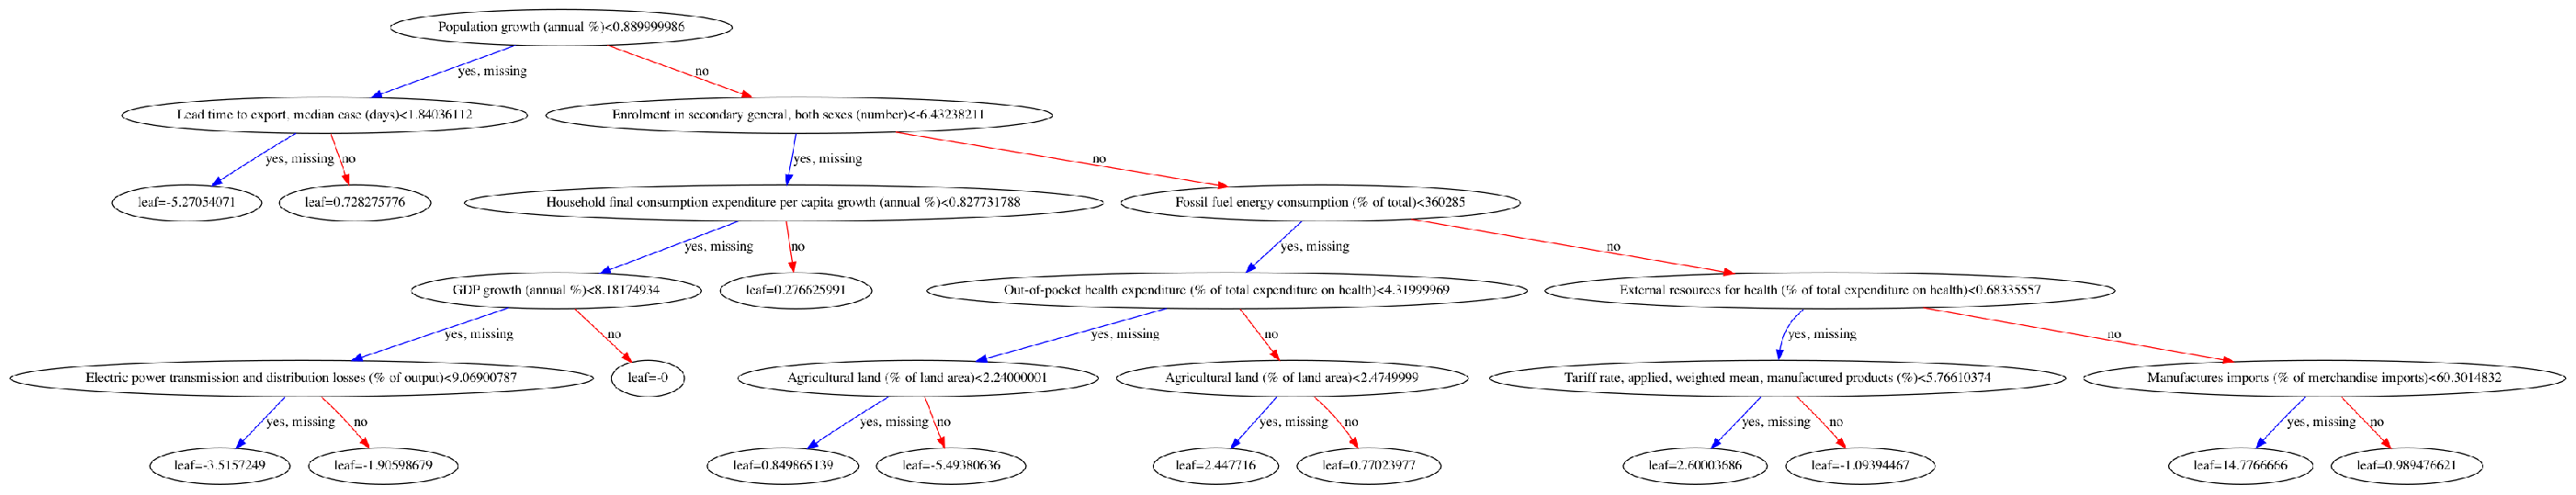

In [174]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [200, 200]
plt.savefig("temp.pdf")
plt.show()

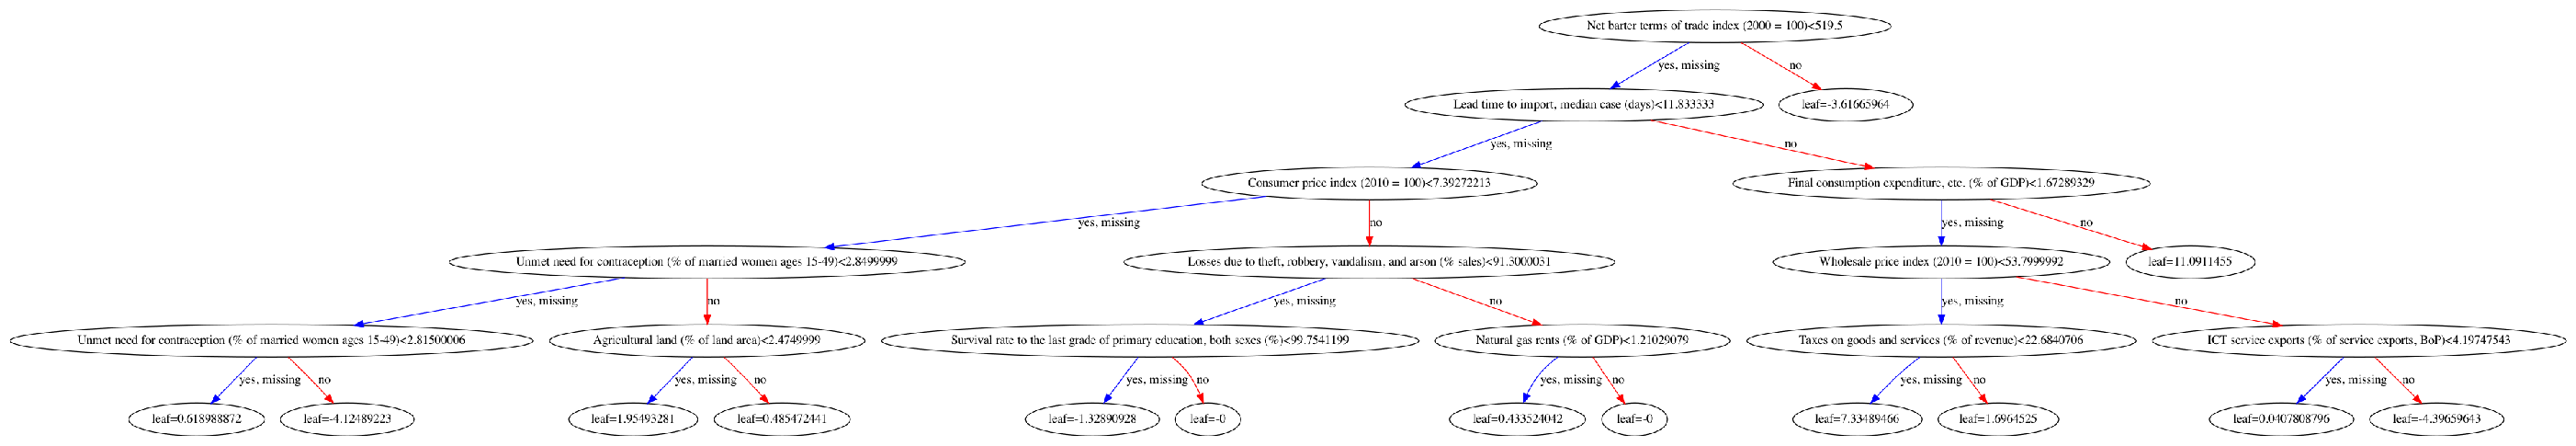

<Figure size 3600x720 with 0 Axes>

In [172]:
fig, ax = plt.subplots(figsize=(50, 50))
xgb.plot_tree(xg_reg, num_trees=4, ax=ax)
plt.show()

plt.savefig("temp.pdf")

R^2 Training Score: 0.94 
R^2 Validation Score: 0.78


Text(0.5, 1.0, 'GDP per person employed (constant 1990 PPP $)')

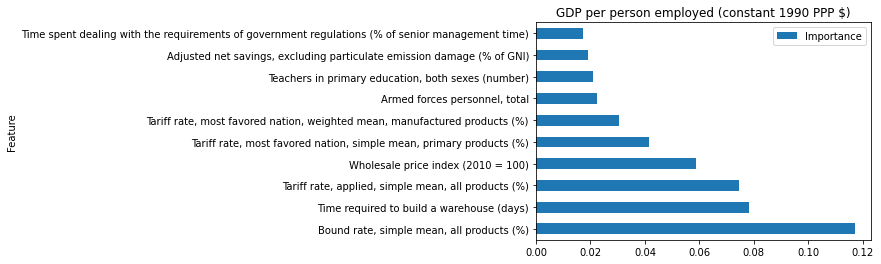

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

def train_data_for(kk,X_column):
    def r2(rf, X_train, y_train):
        return r2_score(y_train, rf.predict(X_train))
    
    y = kk[X_column]
    X = kk[[ x  for x in  kk.columns  if x != X_column]]
    np.random.seed(seed = 42)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.8, random_state = 42)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

    xg_reg.fit(X_train,y_train)

    preds = xg_reg.predict(X_test)

    rf = xg_reg  
    print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(
        rf.score(X_train, y_train),rf.score(X_valid, y_valid))) 
    
    perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)
    ax = perm_imp_rfpimp.head(10).plot(kind="barh")
    ax.set_title(X_column) 
    return ax,perm_imp_rfpimp


X_column='GDP per person employed (constant 1990 PPP $)'
kk = get_data_for_training(X_column)                                                       
ax,perm_imp_rfpimp = train_data_for(kk,X_column)
ax.set_title(X_column) 

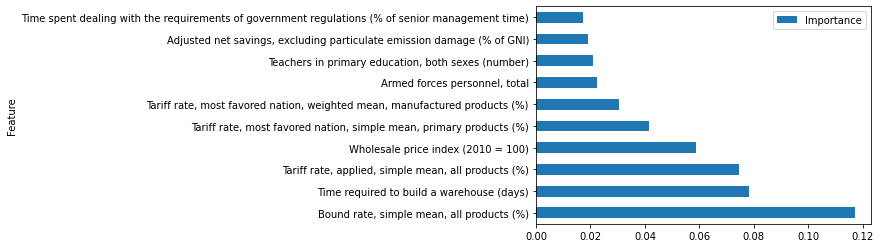

In [28]:
ax = perm_imp_rfpimp.head(10).plot(kind="barh")


In [29]:
perm_imp_rfpimp.head(10)

,Importance
Feature,
"Bound rate, simple mean, all products (%)",0.117068
Time required to build a warehouse (days),0.078349
"Tariff rate, applied, simple mean, all products (%)",0.074401
Wholesale price index (2010 = 100),0.058592
"Tariff rate, most favored nation, simple mean, primary products (%)",0.041354
"Tariff rate, most favored nation, weighted mean, manufactured products (%)",0.030570
"Armed forces personnel, total",0.022425
"Teachers in primary education, both sexes (number)",0.020928
"Adjusted net savings, excluding particulate emission damage (% of GNI)",0.018987
